## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 30 November 2023


# Factor Affecting Trending Youtube Videos!


* Shubham Dubey, sc23sd@leeds.ac.uk
* Reshma Ruby Nediyakalayil, sc23rrn@leeds.ac.uk
* Aishwarya Patil, mm23abp@leeds.ac.uk
* Rishabh Bezbaruah, mm23rb@leeds.ac.uk

# *Project Plan*

## The Data

<div style="text-align: justify;"><span style="font-weight:bold;color:black;">You</span><span style="background-color:red;color:white;padding:2px 5px;font-weight:bold;">Tube</span>, launched in 2005 and later acquired by Google in 2006, has drastically changed the digital landscape as a premier video-sharing platform. It is now the second-largest search engine globally, boasting over 2 billion monthly users. YouTube's success lies in its vast content spectrum, with more than 500 hours of videos uploaded every minute, spanning across numerous channels and themes. The platform operates on the synergy of two critical user groups: content creators, ranging from amateurs to professional media houses, and an engaged audience that interact through likes, comments, shares, and channel subscriptions.</div>

<div style="text-align: justify;">The interaction tools have cultivated diverse YouTube communities, fostering strong connections between creators and viewers and enabling immediate audience feedback. Recognising this extensive content repository and its potential to reach billions, advertisers have ventured onto YouTube, providing various revenue streams for creators. The ad-based revenue model, where ads are placed in popular, engaging videos, has encouraged creators to produce quality content that resonates with viewers. Additionally, YouTube's algorithm, which prioritises content based on engagement metrics like views, likes, shares and comments, plays a critical role. This algorithmic approach benefits both advertisers and creators: it ensures ads are associated with content that attracts and retains viewers, while guiding creators in producing content that aligns with audience preferences. This reciprocal relationship between the algorithm, engagement metrics, and user experience is a cornerstone of YouTube's influence in the digital content domain.</div>

*About the dataset:* 

<div style="text-align: justify;">The datasets utilised in this project has been sourced from the ‘Trending YouTube Video Statistics’ dataset, which is available on Kaggle (Access it here: https://www.kaggle.com/datasets/datasnaek/youtube-new ). Kaggle is a well-respected platform for data science and machine learning, known for hosting a wide range of competitions and providing diverse datasets. Its reliability is enhanced by a strong community of data scientists and support from industry leaders. Additionally, the availability of datasets with high usability scores, for instance, the concerned dataset used in this project which has a usability score of 7.94, further emphasises Kaggle's commitment to quality and user-friendly resources. Furthermore, the datasets used in the project have been distributed under the CC0: Public Domain license by Creative Commons and collected using the YouTube API. While the datasets contain several months of data on daily trending YouTube videos, calculated using several metrics across several countries, the project under consideration focuses on data from Canada (CA) region. The project looks into utilising two files, a CSV file consisting of data on daily YouTube videos from the CA region, and a JSON file used for retrieving the categories of the videos, under which it is listed. Let us start with importing these datasets before exploring it further</div>

<h3> (a) Importing the required modules </h3> 

In [1]:
!pip install session-info
!pip install wordcloud
!pip install textstat
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud
from datetime import datetime
import warnings
import re
import textstat
warnings.simplefilter(action='ignore')

<h3> (b) Importing the CSV Video Data as a dataframe</h3>

In [2]:
videoDF = pd.read_csv("./CAvideos.csv")
videoDF.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


<h3>(c) Importing the JSON file as a dataframe</h3>

In [3]:
categoryDf = pd.read_json("./CA_category_id.json")
categoryDf.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


 <h2>Exploratory Data Analysis</h2>

<h3> (a) Preprocessing</h3>

#### (a.1) Common Methods

In [4]:
# method to get category
def getCategoryFromJson(data):
    category = {}
    for i, row in data.iterrows():
        tempdict = dict(row)
        category[tempdict["items"]["id"]]= tempdict["items"]["snippet"]["title"]
    return category

In [5]:
# method to get combine dataFrames 
def appendCategoryToDataFrame(dataFrame,category):
    tempList = []
    for i,row in dataFrame.iterrows():
        if str(row["category_id"]) in category.keys():
            tempList.append(category[str(row["category_id"])])
        else :
            tempList.append(None)
    dataFrame["category_name"] = tempList
    return dataFrame

In [6]:
# method to print JSON Object in readable format
def printJsonObject(obj):
    line_list = obj.split("\n")
    for line in line_list:
        print(line)

In [7]:
# method to change datetime to specific format
def changeDataTime(column, format_Type):
    return pd.to_datetime(column,format=format_Type)

In [8]:
# method to get complete Dataframe after adding categorydf to videodf
videoDF_copy = videoDF.copy()
getCategoryJson = getCategoryFromJson(categoryDf)
videoComplete = appendCategoryToDataFrame(videoDF_copy,getCategoryJson)
videoComplete.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


<h3>(b) Exploring the video dataframe (CSV file)</h3>

In [9]:
#Exploring the column labels of the videoDF dataframe
videoDF.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

The CSV file, which has been imported into a dataframe named 'videoDF' has 16 column labels, which can be described as follows:
1. video_id: A unique identifier for each video.
2. trending_date: The date on which the video was trending.
3. title: The title of the video.
4. channel_title: The name of the channel that uploaded the video.
5. category_id: A numerical identifier for the category of the video.
6. publish_time: The date and time when the video was published.
7. tags: Tags associated with the video.
8. views: The number of views the video had at the time it was in the dataset.
9. likes: The number of likes the video had (during the specified timeframe in the dataset).
10. dislikes: The number of dislikes the video had (during the specified timeframe in the dataset).
11. comment_count: The number of comments on the video (during the specified timeframe in the dataset).
12. thumbnail_link: A link to the video's thumbnail image.
13. comments_disabled: Indicates whether comments were disabled for the video.
14. ratings_disabled: Indicates whether ratings were disabled for the video.
15. video_error_or_removed: Indicates whether the video had an error or was removed.
16. description: A description of the video.

It is to be noted that each row in the dataframe represents a unique video.

In [10]:
#Invoking dataframe.info() to get a concise summary of the dataframe video.DF
videoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

Each row of the dataframe represents the information of a unique video, with *40,881 entries and 16 columns. As a result, there are approximately 40,881 videos. The columns in the dataframe consist of various data types, which are as follows: three boolean ('comments_disabled', 'ratings_disabled', and'video_error_or_removed'), five integral ('category_id', 'views', 'likes', 'dislikes', and'comment_count'), along with eight object types ('video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', and 'description'), which are typically strings or mixed data types. All the columns in the dataframe have non-null entries except for the **'description' column, which has 39,585 non-null entries*, implying that some videos do not have a description.

In [11]:
#Invoking dataframe.describe() to generate descriptive statistics of the dataframe videoDF
videoDF.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


<div style="text-align: justify;">The table above provides a statistical summary produced by the describe() method on the videoDF dataframe, which takes into account the columns 'category_id', 'views', 'likes', 'dislikes', and 'comment_count', which contain numeric values. The summary includes the count (40,881 for all, that is, the number of videos in the dataset), mean, standard deviation (std), minimum values (min), 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum values (max) for the respective columns. The category_id ranges from 1 to 43, suggesting that there are numerous content categories of the trending videos. Views, likes, dislikes, and comment_count span from 0 to several millions, which is an indication of the wide range of user engagement among the videos in the dataset. As evidenced from the large standard deviation values under the 'views', 'likes', 'dislikes' and 'column_count' columns, it shows us that there is a substantial variability in the concerned metrics.</div>

In [12]:
#Finding the date range of the trending videos
videoDF['trending_date'] = changeDataTime(videoDF["trending_date"],'%y.%d.%m')
videoDF.groupby(by="trending_date").count().sort_values(by="trending_date").index

DatetimeIndex(['2017-11-14', '2017-11-15', '2017-11-16', '2017-11-17',
               '2017-11-18', '2017-11-19', '2017-11-20', '2017-11-21',
               '2017-11-22', '2017-11-23',
               ...
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14'],
              dtype='datetime64[ns]', name='trending_date', length=205, freq=None)

The output above provides the date range of the videos under consideration when it started trending. The dataset contains videos from **14 November 2017 to 14 June 2018.**

<h3>(c) Exploring the category dataframe (Category JSON file)</h3>

In [13]:
#Exploring the column labels of the categoryDf dataframe
categoryDf.columns

Index(['kind', 'etag', 'items'], dtype='object')

The categroyDf dataframe has three columns, named as 'kind', 'etag', and 'items', the details of which shall be explored in the next line of code.

In [14]:
#Invoking dataframe.info() to get a concise summary of the dataframe categoryDf
categoryDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes


<div style="text-align: justify;">The dataframe categoryDf, from the JSON file, has 31 rows, indexed from 0 to 30, under the three columns 'kind', 'etag' amd 'items'. There are no null values present, and the datatype across these three columns are string or mixed types.</div>

In [15]:
#Invoking dataframe.describe() to generate descriptive statistics of the dataframe categoryDf
categoryDf.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
freq,31,31,1


The table above describes the following:
- 'kind' column: There are 31 entries, all of which are identical, with the value "youtube#videoCategoryListResponse". This suggests that the DataFrame is likely related to a response object from the YouTube API that lists video categories.
- 'etag' column: It also has 31 entries, but only one unique value, which is a long hash string. This indicates that every row in the DataFrame has the same etag.
- 'items' column: There are 31 entries, with values being shown as a dictionary containing 'kind' and 'etag' keys among others. This implies that each entry under the 'items' column is a dictionary with several keys and respective values.

In [16]:
#Exploring a complete JSON item in the categoryDf dataframe
output = json.dumps(categoryDf.iloc[0]["items"],indent=1)
printJsonObject(output)

{
 "kind": "youtube#videoCategory",
 "etag": "\"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ\"",
 "id": "1",
 "snippet": {
  "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
  "title": "Film & Animation",
  "assignable": true
 }
}


<div style="text-align: justify;">The code output presented above is the printed JSON object, which represents a category from the YouTube Data API, with keys and values for 'kind', 'etag', 'id'(presumbably category ID), and a 'snippet' dictionary that contains 'channelId', 'title'(name of the category corresponding to the category_id in the videoDF dataframe), and 'assignable'. This particular category is identified as 'Film & Animation'.</div>

<h3>(d) Exploring the Missing Categories in the dataset</h3>

In [17]:
#The function shows the dataframe where categories are not defined/present
def missing_category_rows(dataframe):
    #Parameter: dataframe - the dataframe to be checked
    missing_category_rows = dataframe[dataframe['category_name'].isnull()]
    return missing_category_rows.head(5)

missing_category_rows(videoDF_copy)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
43,0gLWN3uq74o,17.14.11,Ex-intelligence chiefs fire back at Trump crit...,CNN,29,2017-11-12T15:36:51.000Z,"James Clapper|""John Brennan""|""President Trump""...",286231,2530,1127,3239,https://i.ytimg.com/vi/0gLWN3uq74o/default.jpg,False,False,False,Former Director of National Intelligence James...,None
228,HnCU20Cu0fs,17.15.11,Dashcam Norway - Semi-truck narrowly missing kids,FBas,29,2017-11-15T07:37:18.000Z,"dashcam|""accident""|""traffic""|""safety""|""volvo""|...",2253298,4632,104,932,https://i.ytimg.com/vi/HnCU20Cu0fs/default.jpg,False,False,False,Copyright Transferd AS - a part of the Firda B...,None
359,0gLWN3uq74o,17.15.11,Ex-intelligence chiefs fire back at Trump crit...,CNN,29,2017-11-12T15:36:51.000Z,"James Clapper|""John Brennan""|""President Trump""...",311936,2627,1196,3621,https://i.ytimg.com/vi/0gLWN3uq74o/default.jpg,False,False,False,Former Director of National Intelligence James...,None
385,ClwBTkLiivk,17.15.11,Week 4 Challenge: Check out “My Email Leads”,CREA | ACI,29,2017-11-13T13:46:37.000Z,CREA,1898,0,0,0,https://i.ytimg.com/vi/ClwBTkLiivk/default.jpg,True,False,False,www.realtor.ca/2mins,None
489,HnCU20Cu0fs,17.16.11,ORIGINAL: Dashcam Norway - Semi truck narrowly...,Transferd AS,29,2017-11-15T07:37:18.000Z,"dashcam|""accident""|""traffic""|""safety""|""volvo""|...",2510664,0,0,1641,https://i.ytimg.com/vi/HnCU20Cu0fs/default.jpg,False,True,False,Copyright Transferd AS - a part of the Firda B...,None


In [18]:
#The function now gives the descriptive analysis of channels having videos with missing categories
def missing_categories(dataframe):
    #Parameter: dataframe - the dataframe to be analyzed
    #Investigating the rows with missing 'category name' to identify any patterns
    
    missing_category_rows = dataframe[dataframe['category_name'].isnull()]
    
    channel_title_counts =  missing_category_rows['channel_title'].value_counts()

    # Category ID Analysis
    category_id_counts =  missing_category_rows['category_id'].value_counts()

    video_attributes =  missing_category_rows[['views', 'likes', 'dislikes', 'comment_count']].describe()
    comments_status_counts =  missing_category_rows['comments_disabled'].value_counts()
    ratings_status_counts =  missing_category_rows['ratings_disabled'].value_counts()
    description_present =  missing_category_rows['description'].notnull().sum()
    description_missing =  missing_category_rows['description'].isnull().sum()

    # Summarizing the analysis
    missing_values_analysis_summary = {
        'Channels': channel_title_counts,
        'Category ID Counts': category_id_counts,
        'Video Attributes': video_attributes,
        'Comments Status Counts': comments_status_counts,
        'Ratings Status Counts': ratings_status_counts,
        'Description Presence': {'Present': description_present, 'Missing': description_missing}
    }

    return missing_values_analysis_summary


missing_categories(videoDF_copy)

{'Channels': Tele Shekinah            21
 Алексей Навальный         8
 Logan Paul Vlogs          5
 Mormon Channel            5
 You Are Free TV           4
 Marvel Studios Movies     4
 TEDx Talks                3
 Isaac Green               3
 Historica Canada          3
 Blaire White              2
 Scientology               2
 AngryGayPope              2
 CNN                       2
 FBas                      1
 sy mic                    1
 di ma                     1
 CREA | ACI                1
 DOVE TELEVISION           1
 Teeuznunes                1
 Yes Man                   1
 Toronto Zoo               1
 Transferd AS              1
 Katimavik                 1
 Name: channel_title, dtype: int64,
 'Category ID Counts': 29    74
 Name: category_id, dtype: int64,
 'Video Attributes':               views         likes       dislikes  comment_count
 count  7.400000e+01  7.400000e+01      74.000000      74.000000
 mean   1.562184e+06  1.384137e+05   31429.824324   43547.851351
 std

The output above is a descriptive analysis of videos and channels with missing categories. The analysis reveals that this issue is widespread across various channels. It is to be noted that all these videos share the same category ID of 29, signalling a potential problem with category ID-to-name mapping. Furthermore, the absence of category names does not correlate with specific engagement metrics, as views, likes, dislikes, and comment counts vary significantly amongst these videos with missing categories. Furthermore, the presence of comments, ratings, and video descriptions does not appear to be contributing significantly to the missing category names. Most videos with missing categories have the features (such as comments and ratings) enabled, and the summary provided above shows that some of them are quite popular, reaching millions of views and substantial engagement. In summary, the absence of category names in the dataset is likely due to issues with data collection, processing, or mapping, rather than being tied to specific channel types, video attributes, or content characteristics. This appears to be one of the limitations of this dataset.

## *Project Aim and Objectives*

The aim of this project was to analyse and understand the complex dynamics of trending YouTube videos from Canada. Our focus has been to explore the numerous factors at play that influence the popularity and engagement levels of these videos. Firstly, we approached this by examining the characteristics of trending videos, including tags, titles, descriptions, user engagement metrics, and temporal patterns. The project aimed to provide a comprehensive analysis of these elements to offer insights into what makes a YouTube video successful. This analysis is not just limited to academia; it has practical applications for content creators and advertisers, enabling them to optimise their strategies for increased visibility and reach with their respective target audiences.

### Specific Objectives:

*Objective 1 *How does factor like tags, title and description effect trending of videos?:** This objective focuses on understanding the role of elements (like titles, tags, and descriptions) in making a video popular, examining common traits among trending videos, and determining best practices for video optimisation.

*Objective 2 *Temporal Analysis of Trending Videos on YouTube:** This objective aims to explore the timing of when videos trend, including the most engaging times of day and the relationship between video categories and their trending days. It seeks to understand viewership behaviour as well.

*Objective 3 *Check how engagement metrics are crucial for trending videos! :** This objective involves analysing the correlation between the metrics (such as views, likes, and comments) and a video’s trending potential, offering insights into the importance of such metrics.

*Objective 4 *How do categories affect the user engagement?:** Analyse the effect of video categories on user engagement. This objective focused on understanding how different categories affect viewer interaction, including likes, dislikes, comments, and views. It aimed to provide a detailed view of user engagement across various content types.

## **System Design**

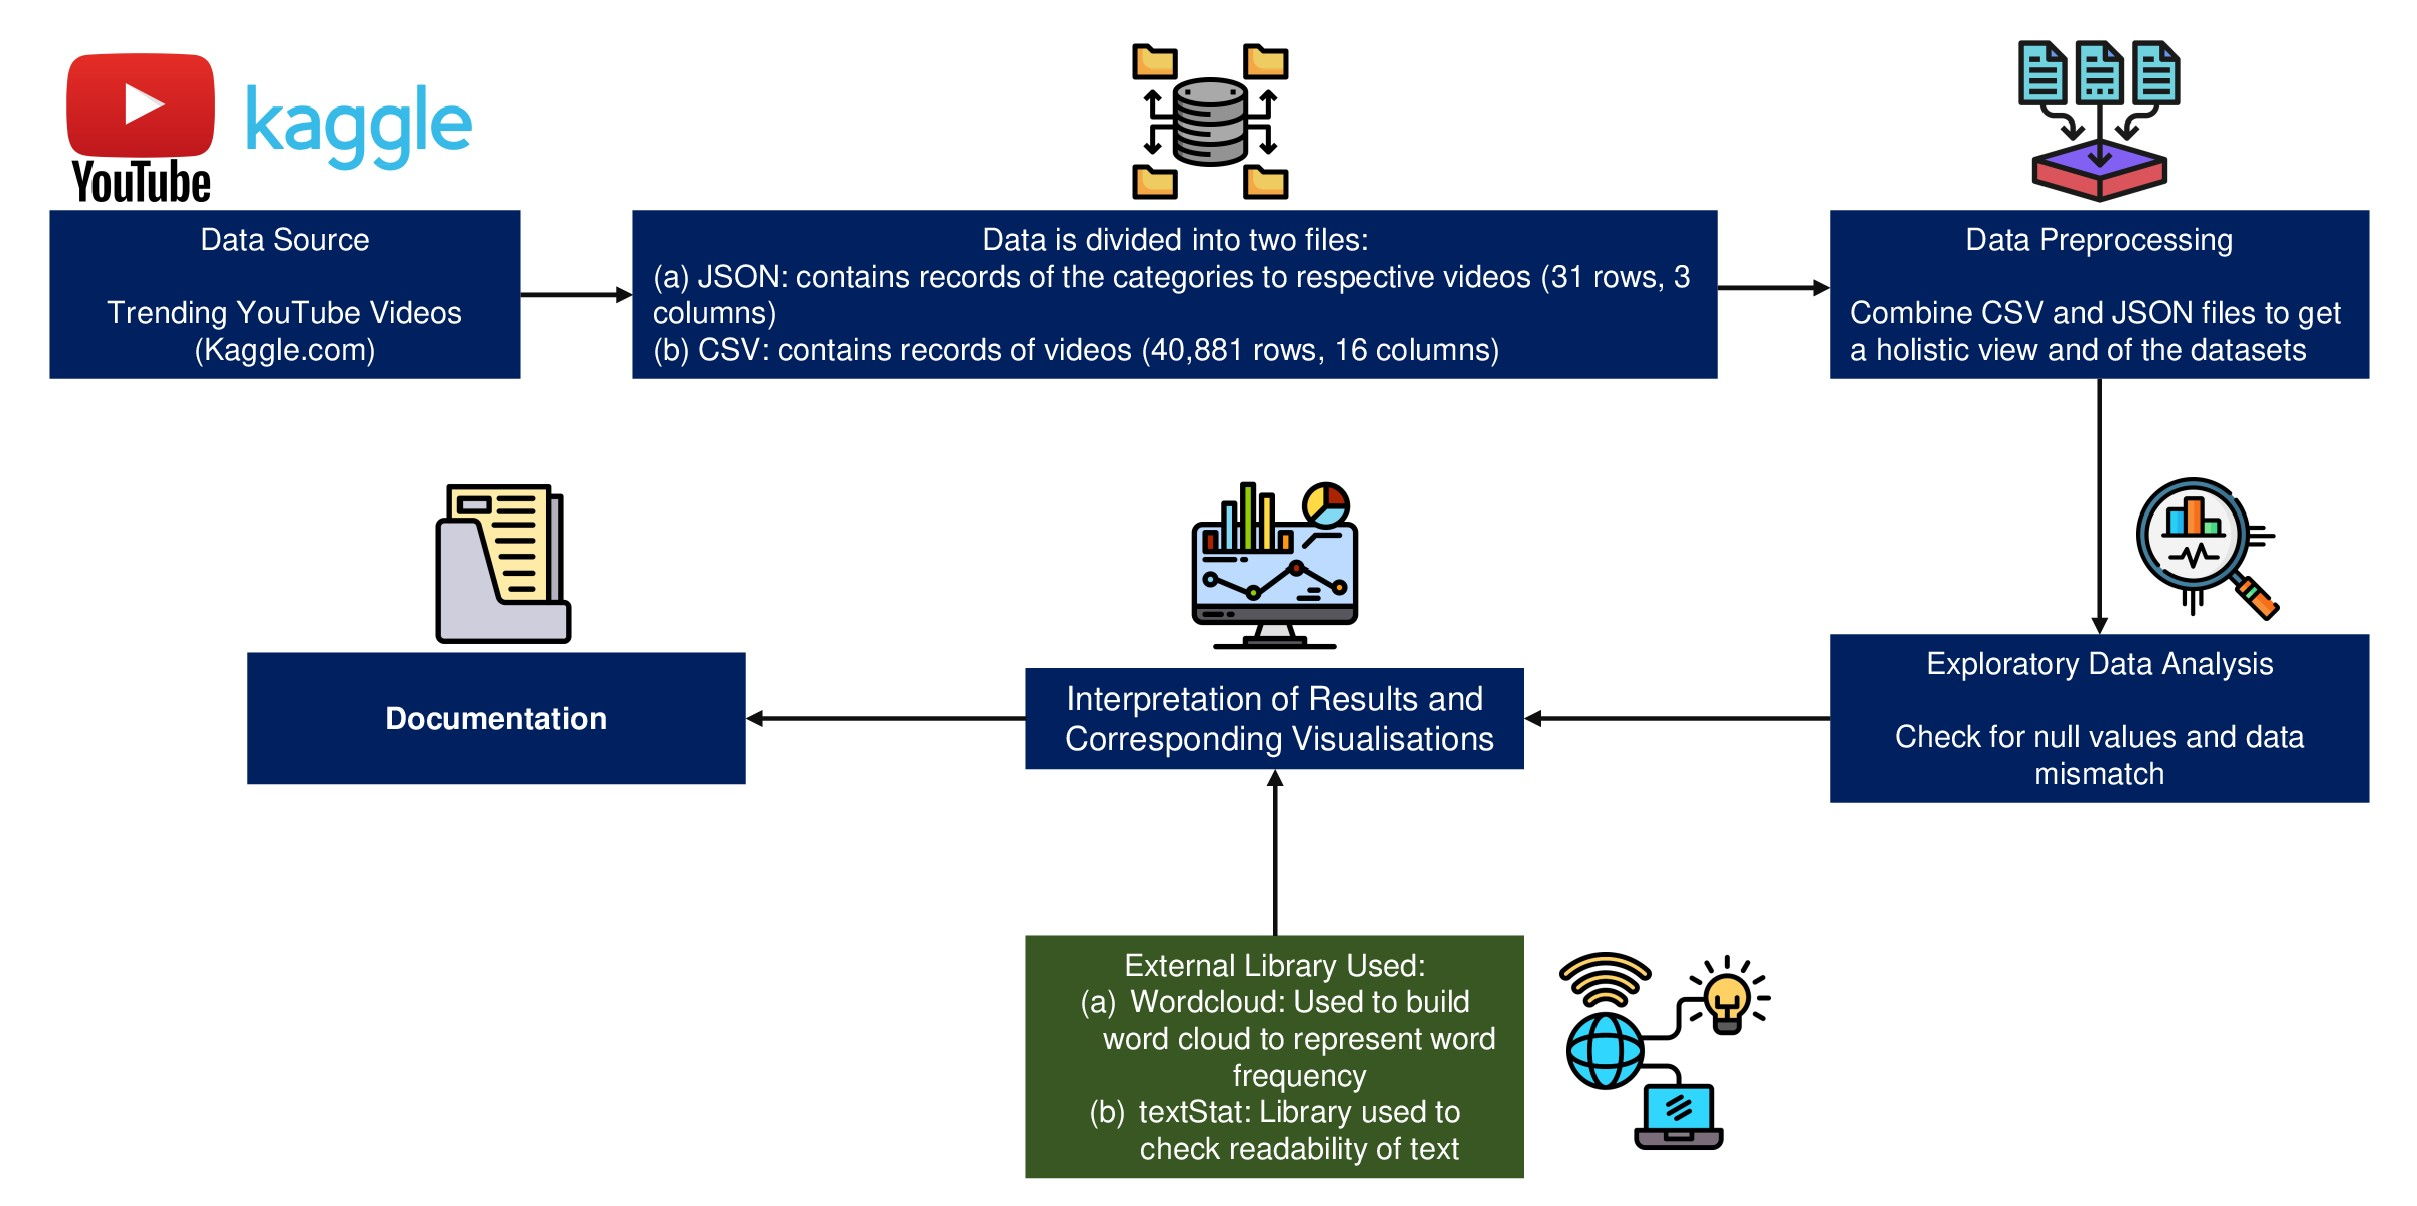

<h3>Architecture</h3>

The system design provided above showcases a data processing pipeline for analysing datasets in the trending YouTube videos. The architecture begins with procuring the data from the source, which is Kaggle.com. The dataset in question consists of two types of files: *a JSON containing video category records (31 rows, 3 columns)* and a **CSV containing records of the videos themselves (40,881 rows, 16 columns)**. The data preprocessing stage involves combining these CSV and JSON files to form a single-combined comprehensive dataset (dataframe, to be more exact). The next step is exploratory data analysis, where the data is checked for null values and inconsistencies. Documentation is maintained throughout the process to ensure clarity and reproducibility. The final stage involves interpreting the results and creating visualisations to present the findings effectively for the project.

# **Program Code**


## Objective 1 : How does factor like tags, title and description effect trending of videos?

In [19]:
## Making copy of original dataframe
videoDFCP = videoDF.copy()

## Making copy of the comprehensive dataframe
videoCompleteDF = videoComplete.copy()

## Objective 1.1 How tags affect videos?

### Objective 1.1.1 : Does having tags in video help it to trend??

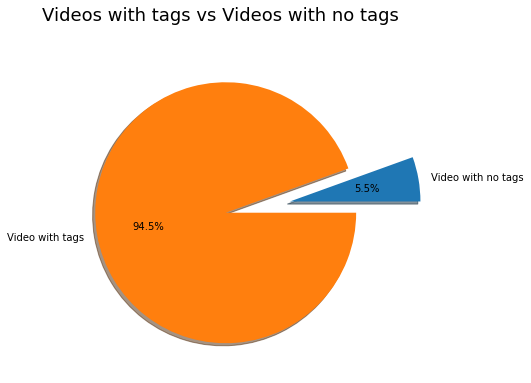

In [20]:
# pie chart representing videos with tags vs videos with no tags
def pieChartTag():
    # ratio of videos with tags V/S vidoes without tags
    pieList = [videoCompleteDF[videoCompleteDF["tags"]=="[none]"].shape[0],videoCompleteDF.shape[0]]
    lables=["Video with no tags","Video with tags"]
    fig, ax = plt.subplots(figsize=(6, 6))
    explode=(0.5,0)
    ax.pie(pieList,labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    fig.suptitle("Videos with tags vs Videos with no tags",fontsize=18)
    plt.show()
pieChartTag()

### Objective 1.1.2 : Most common tags used across trending videos!!

In [21]:
## Word Frequency of tags and sorted in decending order
tagsDictionary = {}
numberOfTagsPerVideo = []
for i,row in videoCompleteDF.iterrows():
    numberOfTagsPerVideo.append(len(row["tags"].split("|")))
    for tag in row["tags"].split('|'):
        if tag in tagsDictionary:
            tagsDictionary[tag] += 1
        else:
            tagsDictionary[tag] = 1
videoCompleteDF["numberOfTags"] = numberOfTagsPerVideo
sortedDict = dict(sorted(tagsDictionary.items(), key=lambda x:x[1], reverse=True))
pieList = [sortedDict["[none]"],videoCompleteDF.shape[0]]
sortedDict.pop("[none]")
sortedDict

{'"funny"': 3383,
 '"comedy"': 2378,
 '"news"': 1343,
 '"2018"': 1106,
 '"video"': 1025,
 '"politics"': 1005,
 '"humor"': 959,
 '"review"': 907,
 '"food"': 899,
 '"reaction"': 853,
 '"music"': 837,
 '"talk show"': 757,
 '"interview"': 750,
 '"family friendly"': 746,
 '"2017"': 741,
 '"comedian"': 729,
 '"funny videos"': 648,
 '"donald trump"': 646,
 '"trump"': 635,
 '"News"': 634,
 '"react"': 633,
 '"television"': 621,
 '"how to"': 589,
 '"science"': 583,
 '"Donald Trump"': 583,
 '"entertainment"': 579,
 '"basketball"': 579,
 '"sports"': 571,
 '"jokes"': 569,
 '"hollywood"': 543,
 '"podcast"': 543,
 '"celebrity"': 543,
 '"movie"': 543,
 '"show"': 538,
 '"family"': 522,
 '"game"': 517,
 '"Entertainment"': 516,
 '"Comedy"': 515,
 '"animation"': 502,
 '"celebrities"': 501,
 '"cooking"': 499,
 '"rap"': 492,
 '"funny video"': 488,
 '"tv"': 483,
 '"challenge"': 476,
 '"vlog"': 471,
 '"hilarious"': 470,
 '"best"': 463,
 '"Politics"': 458,
 '"trailer"': 458,
 '"fun"': 457,
 '"new"': 455,
 '"ki

In [22]:
# average tags per video with devation of 12.
videoCompleteDF["numberOfTags"].describe()

count    40881.000000
mean        19.578093
std         12.660541
min          1.000000
25%         10.000000
50%         19.000000
75%         28.000000
max        124.000000
Name: numberOfTags, dtype: float64

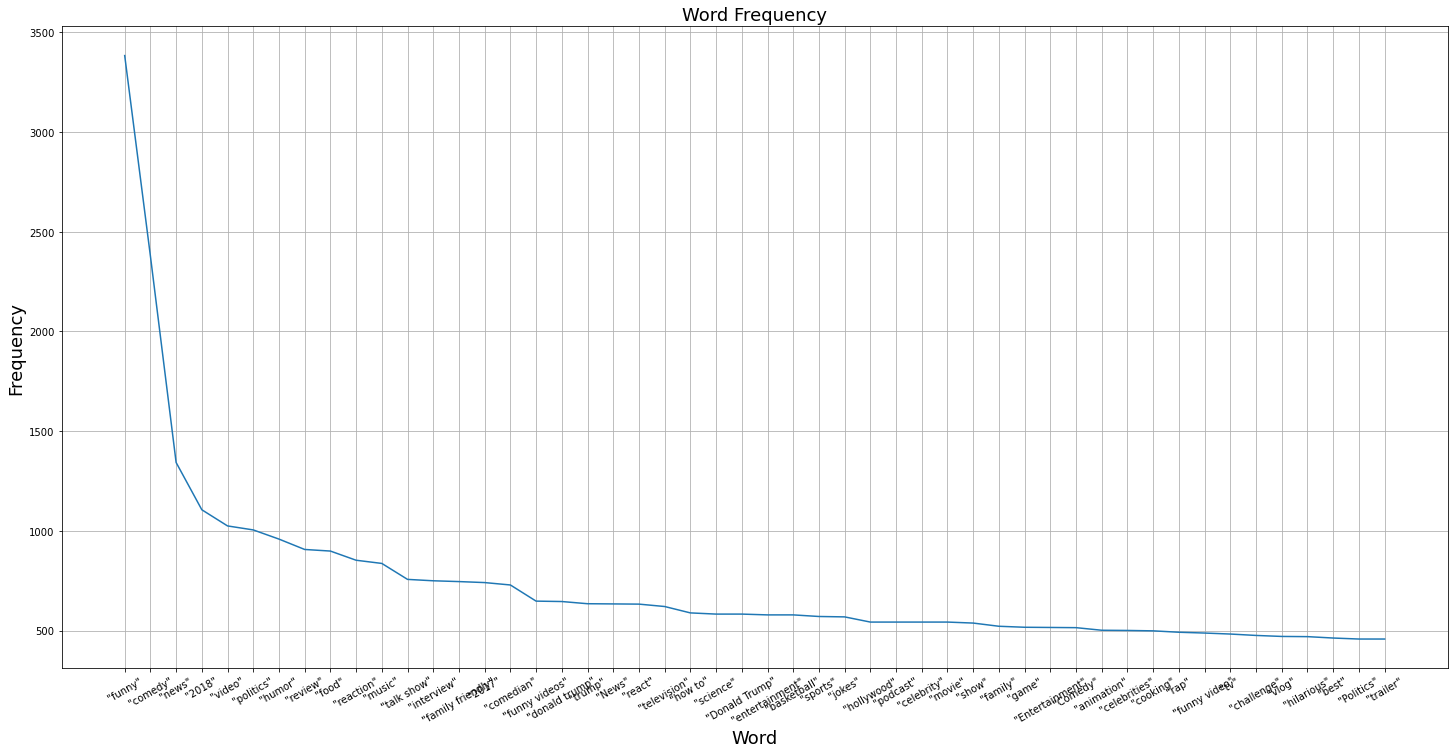

In [23]:
## Plot word frequencey graph for top 50 most occuring word
def wordFrequencyGraph():
    wordsList = []
    countList = []
    for key,val in sortedDict.items():
        wordsList.append(key)
        countList.append(val)
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(wordsList[:50],countList[:50])
    ax.set_xticklabels(wordsList[:50],fontsize=10)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.title("Word Frequency",fontsize=18)
    plt.ylabel("Frequency",fontsize=18)
    plt.xlabel("Word",fontsize=18)
    plt.grid()
    plt.show()
wordFrequencyGraph()

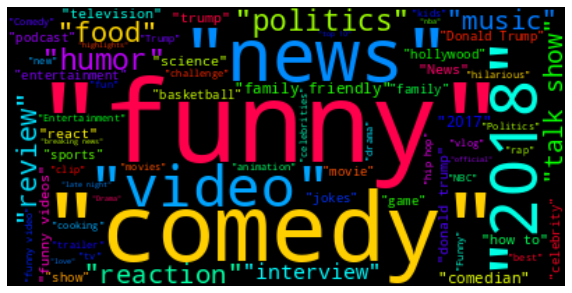

In [24]:
## Word Cloud of most frequently used Tags
def wordCloud():
    cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(sortedDict)
    plt.figure(figsize=(10,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
wordCloud()

## Objective 1.2 How title of video affect videos?

### Objective 1.2.1 : Do you like long youtube title or short?? Lets see what other thinks!!

In [25]:
## Length of title and sorted in descending order
def lengthOfTitle():
    titleList = []
    for i,row in videoCompleteDF.iterrows():
        titleList.append(len(row["title"].split(" ")))
    videoCompleteDF["titleWordCount"] = titleList
    return videoCompleteDF.sort_values(by="titleWordCount", ascending=False)
sortedVideo = lengthOfTitle()

In [26]:
# Dataframe to find average and standard deviation 
sortedVideo.describe()["titleWordCount"]

count    40881.000000
mean         9.371640
std          4.226966
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         30.000000
Name: titleWordCount, dtype: float64

In [27]:
# grouping data by number of words in title to see what is average number of words in title
grouppedVidep = sortedVideo.groupby(by="titleWordCount").count()["video_id"]
grouppedVidep

titleWordCount
1      497
2      460
3     1508
4     2202
5     2976
6     3580
7     4104
8     3697
9     3688
10    3436
11    2892
12    2497
13    2070
14    1728
15    1676
16    1245
17    1019
18     695
19     386
20     232
21     153
22      68
23      49
24      11
25       8
26       1
28       2
30       1
Name: video_id, dtype: int64

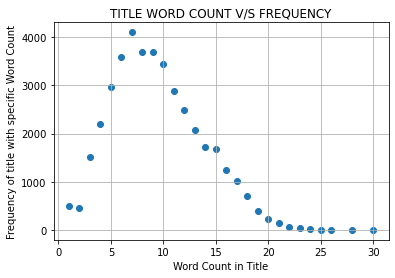

In [28]:
# Scatter plot to show distribution of word countin title to its frequency
def wordFrequency():
    plt.scatter(grouppedVidep.index,grouppedVidep)
    plt.xlabel("Word Count in Title")
    plt.ylabel("Frequency of title with specific Word Count")
    plt.title("TITLE WORD COUNT V/S FREQUENCY")
    plt.grid()
wordFrequency()

 ### Objective 1.2.2 Ever thought which of these video title would be trending Click-Bait, Question, Statement

In [29]:
# check if text has click-bait statement
# if text contains click-bait statement it return True else false
def isClickBait(text):
    clickbait_keywords = ['shocking', 'amazing', 'unbelievable', 'must see', 'you won\'t believe', 'exclusive', 'secret', 'revealed', 'hidden', 'mind-blowing', 'insane']
    CLICKBAIT_PATTERN = re.compile('|'.join(clickbait_keywords), flags=re.IGNORECASE)
    return bool(re.search(CLICKBAIT_PATTERN, text))

In [30]:
# check if text is a question or statement
# returns either "Question" OR "Statement"
def categorize_title(title):
    if re.search(r'\b(?:how|what|when|where|which|who|whom|whose|why|is|are|am|will|can|could|do|does|did|has|have|had|should|would|may|might|must|shall|will|won\'t|wouldn\'t|can\'t|couldn\'t|didn\'t|doesn\'t|haven\'t|hasn\'t|hadn\'t|shouldn\'t|isn\'t|aren\'t|amn\'t)\b', title, flags=re.IGNORECASE):
        return 'Question'
    else:
        return 'Statement'

In [31]:
# classifying data into clickbait, statement and question!!
videoCompleteDF["clickBait"] = videoCompleteDF["title"].apply(isClickBait)
clickBaitDF=videoCompleteDF[videoCompleteDF["clickBait"]==True]
videoCompleteDF["Category_Title"] =  videoCompleteDF["title"].apply(categorize_title)
statementDF = videoCompleteDF[videoCompleteDF["Category_Title"]=="Statement"]
questionDF = videoCompleteDF[videoCompleteDF["Category_Title"]=="Question"]

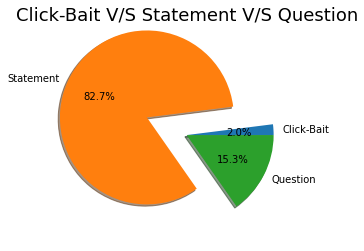

In [32]:
# pie chart representing video titles segregated into clickBait, statement, question
def titleType():
    lables=["Click-Bait","Statement","Question"]
    pieList=[clickBaitDF.shape[0],statementDF.shape[0],questionDF.shape[0]]
    explode=[0,0.5,0]
    plt.title("Click-Bait V/S Statement V/S Question",fontsize=18)
    plt.pie(pieList,labels=lables,autopct='%1.1f%%',explode=explode,shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.show()
titleType()

### Objective 1.3 : Curious on what to put as description??

### Objective 1.3.1 Does having links in description helps videos to trend ? If so how many? 

In [33]:
## method to check if text contain link
## if link exist, returns list of links else empty list
def hasLink(text):
    URL_PATTERN = "(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    return(re.findall(URL_PATTERN,text))

In [34]:
## Check record which has link in description and how many link per video description
videoCompleteDF["description"] = videoCompleteDF["description"].apply(str)
lenLink = []
for i , row in videoCompleteDF.iterrows():
        lenLink.append(len(hasLink(row["description"])))
videoCompleteDF["lenLink"] = lenLink

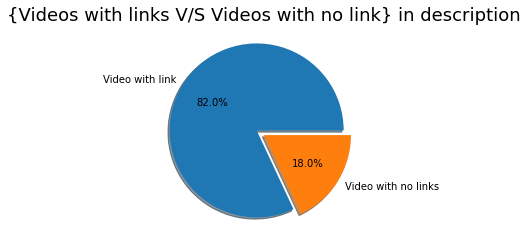

In [35]:
## Percent of videos with link in description
def pieChartDescriptionLink():
    lables=["Video with link","Video with no links"]
    explode=(0.1,0)
    plt.title("{Videos with links V/S Videos with no link} in description",fontsize=18)
    plt.pie([videoCompleteDF[videoCompleteDF["lenLink"]!=0].shape[0],videoCompleteDF[videoCompleteDF["lenLink"]==0].shape[0]],labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.show()
pieChartDescriptionLink()

In [36]:
# average number of links in trending video description
videoCompleteDF["lenLink"].describe()["mean"]

7.588415156185025

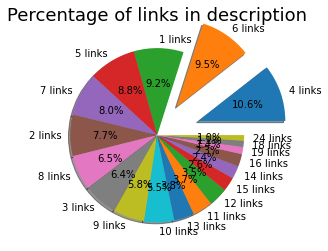

<Figure size 1440x1440 with 0 Axes>

In [37]:
## pieChart representing number of links on videos description
def pieChartDescriptionLinks():
    videoLinkLenDf = videoCompleteDF.groupby("lenLink").count()
    videoLinkLenDf = videoLinkLenDf.sort_values("video_id",ascending=False)

    explode = [0]*17
    explode.insert(0,0.5)
    explode.insert(1,0.4)

    lables = []
    for length in videoLinkLenDf.index[1:20]:
        if length == 0:
            lables.append(str(length)+" link")
        else:
            lables.append(str(length)+" links")
    plt.title("Percentage of links in description", fontsize=18)
    plt.pie(videoLinkLenDf["video_id"][1:20],labels=lables,explode=explode,radius=1,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.figure(figsize=(20,20))
    plt.show()
pieChartDescriptionLinks()

### Objective 1.3.2 Ever thought if trending video is influenced on whether a Eighth grade can understand its description after single read!!

Here we used a python library called **textstat**, which is used to calculate statistics from text It helps determine readability, complexity, and grade level. We are focused on using gunning_fog (for more info visit https://en.wikipedia.org/wiki/Gunning_fog_index) value to calculate readability. 
The module has limitation as it has limited language access, and as our data contain multiple language hence few values are unexpected hence we remove those values!!

In [38]:
### readability analisys of description
videoCompleteDF["textstat"] = videoCompleteDF["description"].apply(textstat.gunning_fog).apply(round)

In [39]:
## Describe textstat columns to check mean readiability score
videoCompleteDF["textstat"].describe()

count    40881.000000
mean        10.086740
std         11.782434
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        480.000000
Name: textstat, dtype: float64

In [40]:
## slice datafrome to get textstat less then 20
## due to limitation of textstat library, we have few values which is over 20, 
## while gunning fog value limits at 20 hence removing those values greater than 20
videoCompleteDF= videoCompleteDF[videoCompleteDF["textstat"]<=20]
videoCompleteDF.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,category_name,numberOfTags,titleWordCount,clickBait,Category_Title,lenLink,textstat
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,6,8,False,Statement,14,7
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,STill got a lot of packages. Probably will las...,Comedy,11,6,False,Statement,9,8
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,23,10,False,Statement,19,11
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,I know it's been a while since we did this sho...,Entertainment,14,5,False,Statement,7,9
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,...,False,False,► Follow for News! - https://twitter.com/KEEMS...,News & Politics,17,16,False,Statement,12,10


In [41]:
videoCompleteDF["textstat"].describe()

count    39409.000000
mean         8.998427
std          3.802738
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         20.000000
Name: textstat, dtype: float64

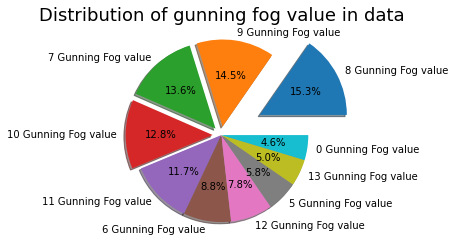

<Figure size 1152x1440 with 0 Axes>

In [42]:
## piechart representing split of gunning fog value across data
def pieChartGunningValue():
    videoTextDf = videoCompleteDF.groupby("textstat").count()
    videoTextDf = videoTextDf.sort_values("video_id",ascending=False)
    explode = [0]*6
    explode.insert(0,0.5)
    explode.insert(1,0.1)
    explode.insert(2,0.1)
    explode.insert(3,0.1)
    lables = []
    for length in videoTextDf.index[:10]:
            lables.append(str(length)+" Gunning Fog value")
    plt.title("Distribution of gunning fog value in data",fontsize=18)
    plt.pie(videoTextDf["video_id"][:10],labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.figure(figsize=(16,20))
    plt.show()
pieChartGunningValue()

### Objective 1.3.3 Does asking for Like, Subscribe or Share really helps in trending of videos ??? 

In [43]:
## call to action method check if Subscribe,Like,Share pattern is seen in text
## return the matching value
def callToAction(text):
    CTA_PATTERN = re.compile("(Subscribe|Like|Share|Sharing|shared|Liking|subscribing|subscribed|)",re.IGNORECASE)
    return(re.search(CTA_PATTERN,text).group())

In [44]:
#Calcualte if call to action in description influence if the video would be trending!
callToActionList = []
for i,row in videoCompleteDF.iterrows():
    match = callToAction(row["description"])
    if match:
        callToActionList.append(match)

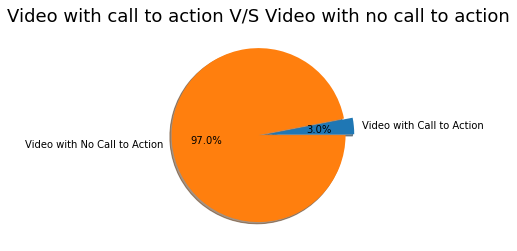

In [45]:
## Percent of videos with link in description
def piechartCallToAction():
    lables=["Video with Call to Action","Video with No Call to Action"]
    explode=(0.1,0)
    plt.title("Video with call to action V/S Video with no call to action", fontsize=18)
    plt.pie([len(callToActionList),videoCompleteDF.shape[0]],labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.show()
piechartCallToAction()

## Objective 2 : Temporal Analysis of Trending Videos on YouTube

In [46]:
## Making copy of original dataframe
videosDF = videoDF.copy()

# Getting complete DF after adding Category to VideosDF
getCategoryJson = getCategoryFromJson(categoryDf)
videoCategoryDF = appendCategoryToDataFrame(videosDF,getCategoryJson)
videoCategoryDF.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


In [47]:
# Converting to datetime format
videoCategoryDF['trending_date'] = changeDataTime(videoCategoryDF["trending_date"],'%y.%d.%m')
videoCategoryDF['publish_time'] = changeDataTime(videoCategoryDF['publish_time'],"")
videoCategoryDF['publish_date'] = changeDataTime(videoCategoryDF['publish_time'], '%y.%d.%m')
videoCategoryDF['publish_hour'] = videoCategoryDF['publish_time'].dt.hour
videoCategoryDF['day_of_week'] = videoCategoryDF['trending_date'].dt.day_name()

### Objective 2.1 : Analyzing the Time-to-Trend for Videos Based on Category

In [48]:
# Calculating the time the time to trend for videos by getting the difference between their publication date and trending date.
time_to_trend=[]
for i, row in videoCategoryDF.iterrows():
    a=row['trending_date'].tz_localize(None)-row['publish_date'].tz_localize(None)
    time_to_trend.append(a.days)

videoCategoryDF['time_to_trend'] = time_to_trend

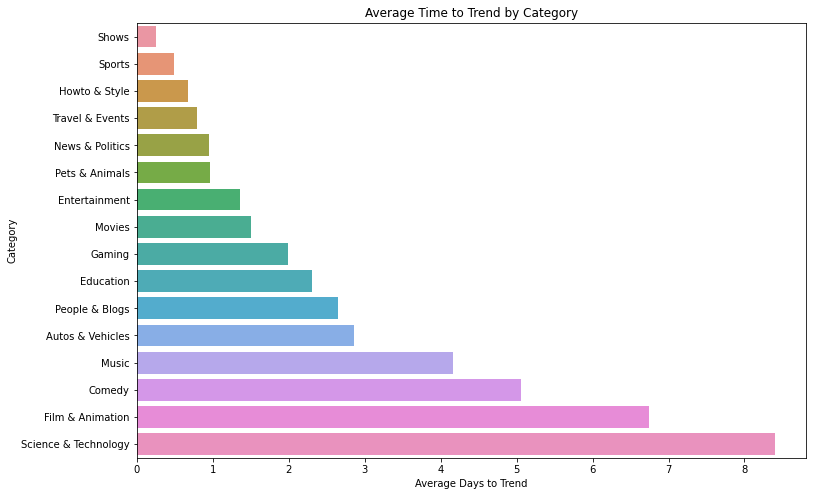

In [49]:
# Average Time to Trend by Category
def categoryTrendTime():
    avg_time_to_trend_by_category = videoCategoryDF.groupby('category_name')['time_to_trend'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    sns.barplot(x='time_to_trend', y='category_name', data=avg_time_to_trend_by_category.sort_values(by='time_to_trend'))
    plt.title('Average Time to Trend by Category')
    plt.xlabel('Average Days to Trend')
    plt.ylabel('Category')
    plt.show()
categoryTrendTime()

### Objective 2.2 : Identifying the Hour of the Day with Maximum Engagement

In [50]:
# Group by publish hour and calculate the total likes, dislikes, and views
likes_by_hour = videoCategoryDF.groupby('publish_hour')['likes'].sum()
dislikes_by_hour = videoCategoryDF.groupby('publish_hour')['dislikes'].sum()
views_by_hour = videoCategoryDF.groupby('publish_hour')['views'].sum()

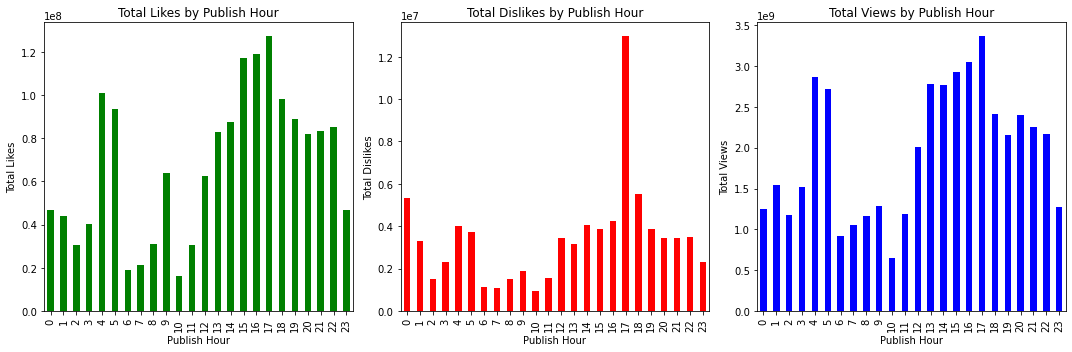

In [51]:
def publishHourEngagement():
    plt.figure(figsize=(15, 5))

    # Likes
    plt.subplot(1, 3, 1)
    likes_by_hour.plot(kind='bar', color='green')
    plt.title('Total Likes by Publish Hour')
    plt.xlabel('Publish Hour')
    plt.ylabel('Total Likes')

    # Dislikes
    plt.subplot(1, 3, 2)
    dislikes_by_hour.plot(kind='bar', color='red')
    plt.title('Total Dislikes by Publish Hour')
    plt.xlabel('Publish Hour')
    plt.ylabel('Total Dislikes')

    # Views
    plt.subplot(1, 3, 3)
    views_by_hour.plot(kind='bar', color='blue')
    plt.title('Total Views by Publish Hour')
    plt.xlabel('Publish Hour')
    plt.ylabel('Total Views')

    plt.tight_layout()
    plt.show()
publishHourEngagement()

### Objective 2.3 : Exploring the Relation Between Category and Trending Day

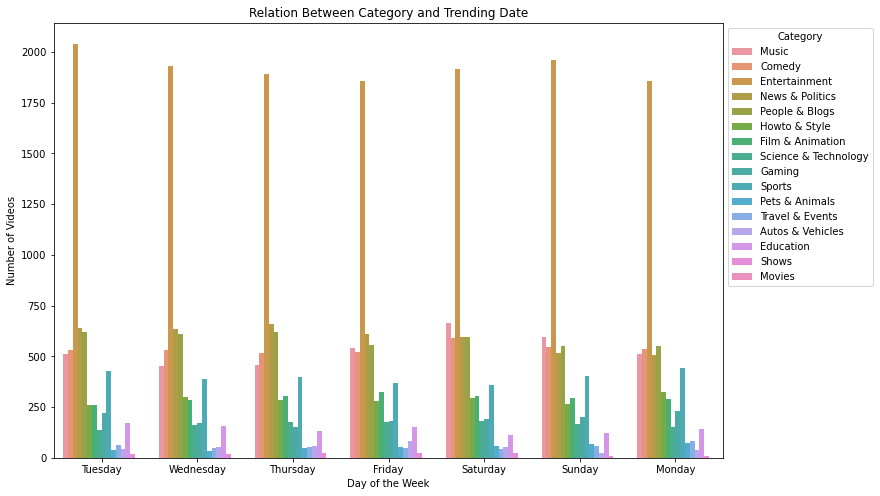

In [52]:
#Explore the Relation Between Category and Trending Day
def categoryTrendDay():
    plt.figure(figsize=(12, 8))
    sns.countplot(x='day_of_week', hue='category_name', data=videoCategoryDF)
    plt.title('Relation Between Category and Trending Date')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Videos')
    plt.legend(title='Category', bbox_to_anchor=(1, 1))
    plt.show()
categoryTrendDay()

## Objective 3 : Check how engagement metrics are crucial for trending videos!

<h3>Objective 3.1: Are factors like "likes", "dislikes","views","comment_count" correlated to each other?</h3>

In [53]:
#Makes the copy of main dataframe.
videos=videoDF.copy()
hours=[]
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m')
videos['publish_time'] = pd.to_datetime(videos['publish_time'])
for i, k in videos.iterrows():
    hours.append(int(k["publish_time"].hour))
videos["hours"]=hours   
videos.head(5)
newvideos=videos[["views","likes","dislikes","comment_count"]]

<h3>correlation_matrix</h3>

In [54]:
# calculate the correlation coefficient
correlation_matrix = newvideos[["views","likes","dislikes","comment_count"]].corr()
correlation_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000


<h3>correlation graph</h3>

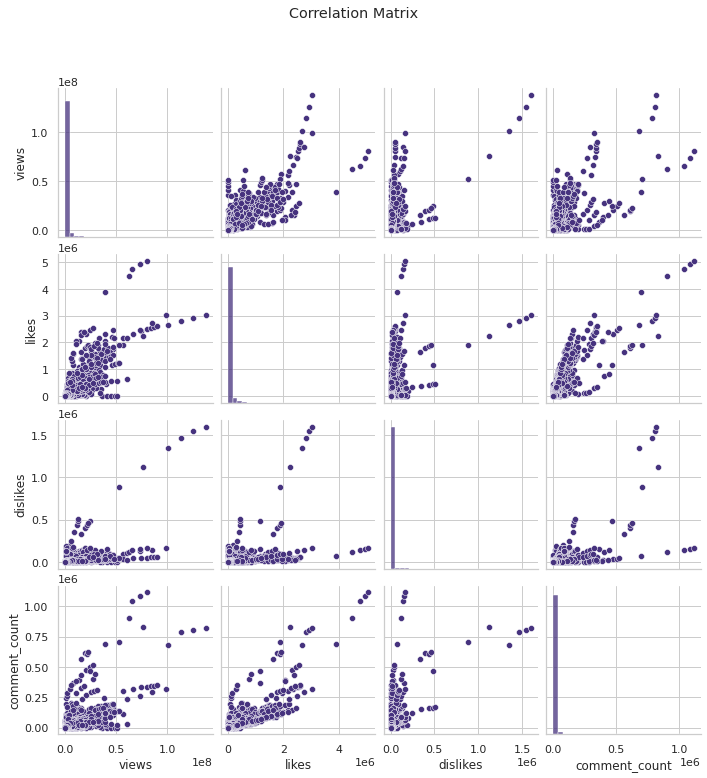

In [55]:
# scatter plots to visualize the correlation between pairs of metrics

def correlation_graph(newvideos):
  # Set the color palette
  sns.set(style="whitegrid", palette="viridis")

  # Create a pairplot of the DataFrame with a histogram on the diagonal (diag_kws={'bins': 30})
  g = sns.pairplot(newvideos, diag_kws={'bins': 30})
  g.fig.suptitle("Correlation Matrix", y=1.08)
  plt.show()

    
correlation_graph(newvideos)   


<h3>correlation matrix using heatmap</h3>


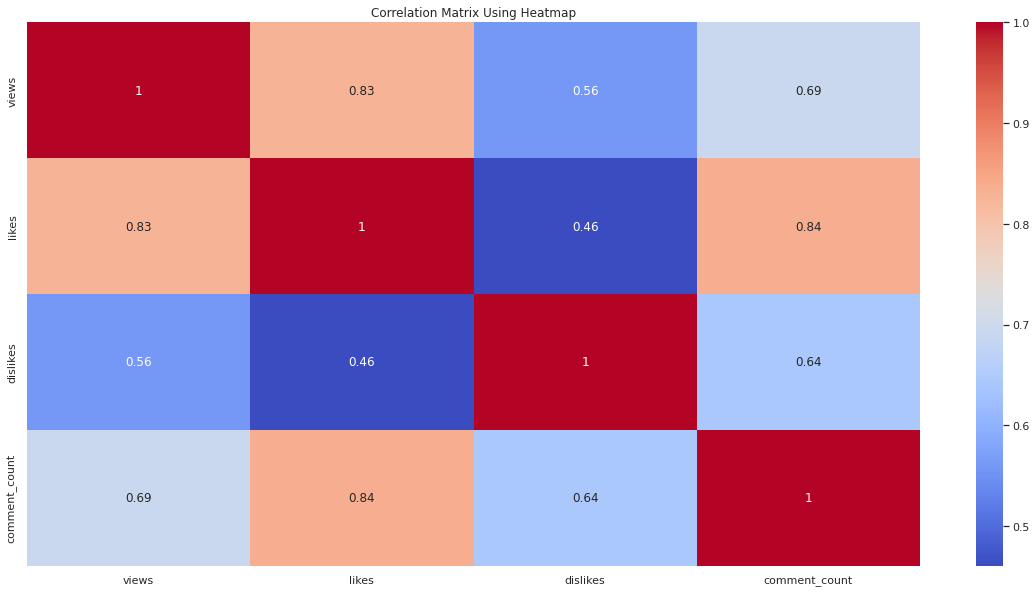

In [56]:
#correlation matrix using heatmap
def correlation_matrix_heatmap(correlation_matrix):
       fix,axs=plt.subplots(figsize=(20,10))
       sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
       plt.title('Correlation Matrix Using Heatmap')
       plt.show()
       
correlation_matrix_heatmap(correlation_matrix)

<h3>Objective 3.2: Does the time of publication impact a videos's popularity?</h3>

<h3>Objective 3.2.1: Distribution of Trending Videos by Publication Hour</h3>

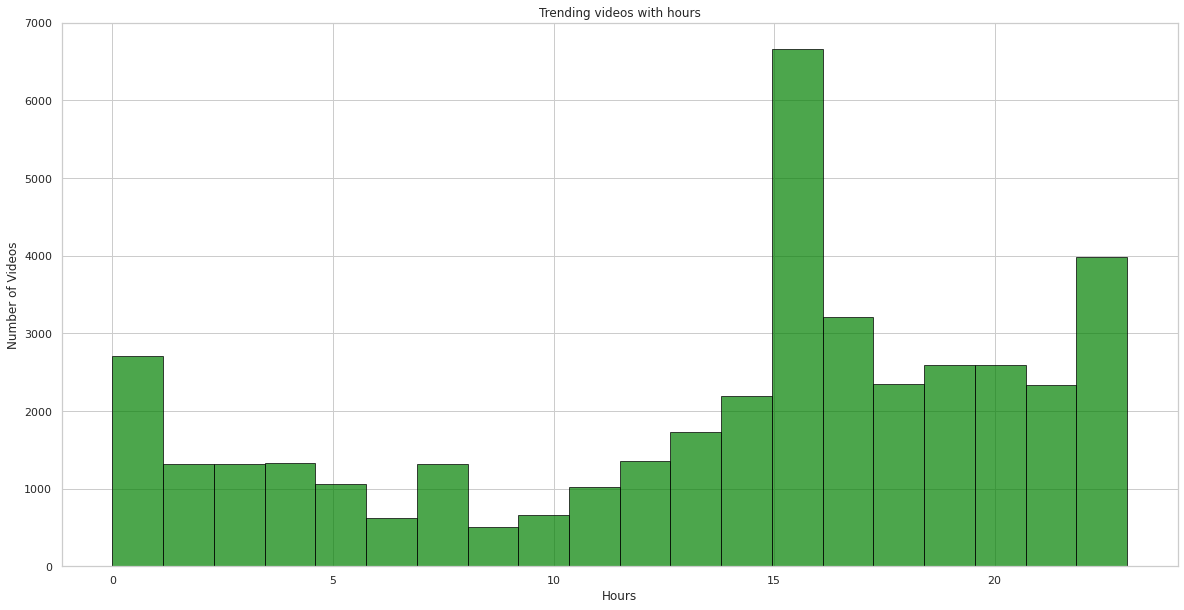

In [57]:
def trending_videos_by_publication_hour(videos):
    plt.figure(figsize=(20,10))
    plt.hist('hours', data=videos, bins=20, color="green", edgecolor='black', alpha=0.7)
    # Add labels and title
    plt.xlabel('Hours')
    plt.ylabel('Number of Videos')
    plt.title('Trending videos with hours')
    plt.show()
    
trending_videos_by_publication_hour(videos)

<h3>Objective 3.3: Does turning off video ratings and comments impact the number of views and overall trendiness of videos?</h3>

<h3>Objective 3.3.1: Standard Statistics with Visualisations</h3>

In [58]:
#Preparing data for deeper analysis

grouped_data = videos.groupby(['comments_disabled', 'ratings_disabled']).agg(
    average_views=('views', 'mean'),
    total_videos=('video_id', 'count')
).reset_index()

grouped_data

,comments_disabled,ratings_disabled,average_views,total_videos
0,False,False,1.149223e+06,40082
1,False,True,4.045578e+05,216
2,True,False,8.523823e+05,520
3,True,True,4.733370e+06,63


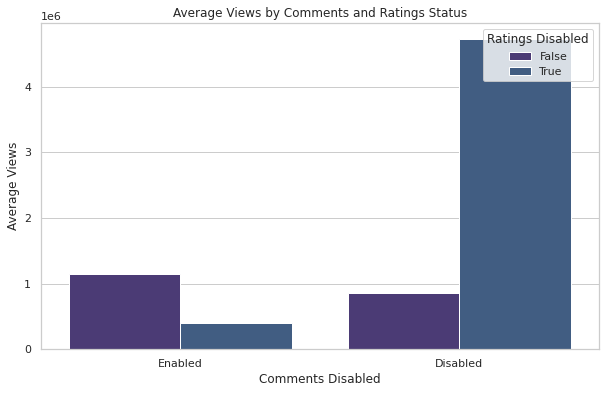

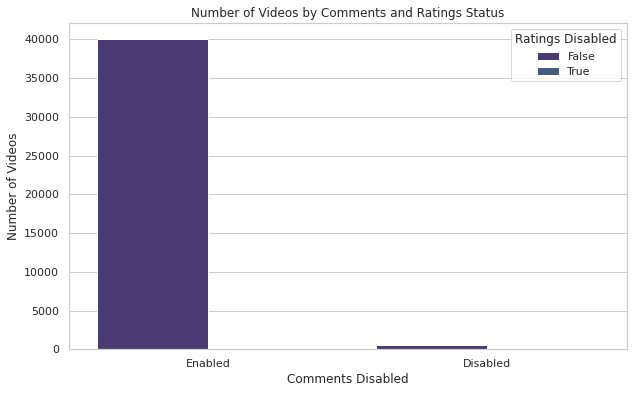

In [59]:
# Plotting the results
def average_views_and_number_of_videos_by_comments_and_ratings_status(grouped_data):
  plt.figure(figsize=(10, 6))
  grouped_data['comments_disabled'] = grouped_data['comments_disabled'].astype(str)
  grouped_data['ratings_disabled'] = grouped_data['ratings_disabled'].astype(str)

# Creating a bar plot for average views
  sns.barplot(x='comments_disabled', y='average_views', hue='ratings_disabled', data=grouped_data)
  plt.title('Average Views by Comments and Ratings Status')
  plt.xlabel('Comments Disabled')
  plt.ylabel('Average Views')
  plt.xticks([0, 1], ['Enabled', 'Disabled'])
  plt.legend(title='Ratings Disabled', loc='upper right')
  plt.show()

# Plotting the number of videos in each category
  plt.figure(figsize=(10, 6))
  sns.barplot(x='comments_disabled', y='total_videos', hue='ratings_disabled', data=grouped_data)
  plt.title('Number of Videos by Comments and Ratings Status')
  plt.xlabel('Comments Disabled')
  plt.ylabel('Number of Videos')
  plt.xticks([0, 1], ['Enabled', 'Disabled'])
  plt.legend(title='Ratings Disabled', loc='upper right')
  plt.show()
  
average_views_and_number_of_videos_by_comments_and_ratings_status(grouped_data)  

<h3>Objective 3.3.2: Distribution of Views for Different Combinations of Comments and Ratings Status</h3>

In [60]:
#Creating a new column for easy plotting

videos['Status Combination'] = videos.apply(
    lambda row: 'Comments {} - Ratings {}'.format(
        'Disabled' if row['comments_disabled'] else 'Enabled',
        'Disabled' if row['ratings_disabled'] else 'Enabled'),
    axis=1
)

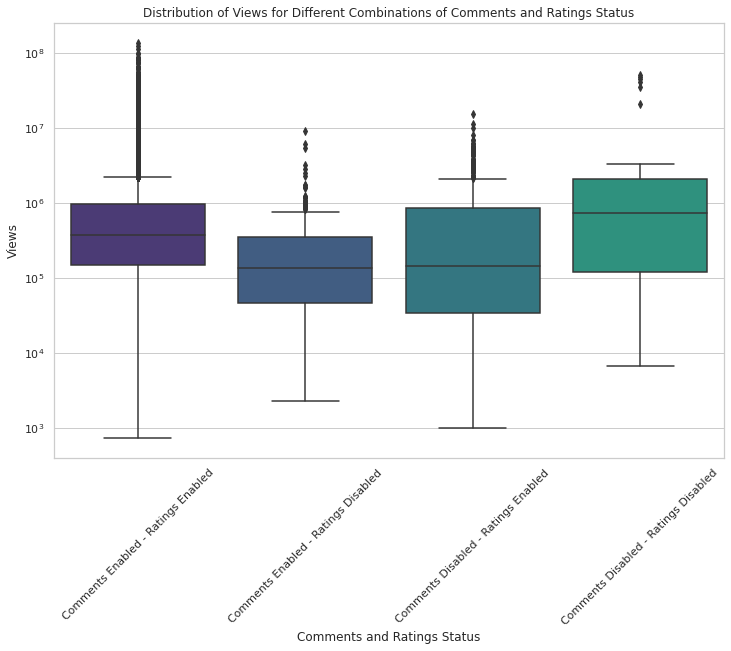

In [61]:
#Plotting boxplots for distribution of views

def distribution_of_views_for_combinations_of_comments_ratings_status(Main_videos):
      plt.figure(figsize=(12, 8))
      sns.boxplot(x='Status Combination', y='views', data=Main_videos)
      plt.title('Distribution of Views for Different Combinations of Comments and Ratings Status')
      plt.xlabel('Comments and Ratings Status')
      plt.ylabel('Views')
      #The plt.yscale('log') command in a matplotlib plot changes the scale of the y-axis to a logarithmic scale. This is particularly useful when dealing with data that covers a wide range of values, as a logarithmic scale can make the plot more readable by compressing the scale of larger values while expanding the scale of smaller values
      plt.yscale('log')  
      plt.xticks(rotation=45)
      plt.show()
  
distribution_of_views_for_combinations_of_comments_ratings_status(videos)  

<h2> Objective 4: How do categories affect the user engagement? </h2>

In [62]:
# We start with creating a new dataframe from the original copy
videoDF_R = videoDF.copy()

In [63]:
## We then factor in the original category names from the JSON file, and map it with the category_id column
## Using the common method
getCategoryJson = getCategoryFromJson(categoryDf)
videoCat = appendCategoryToDataFrame(videoDF_R,getCategoryJson)
videoCat.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


<h2> Objective 4.1: Curious to see which categories have the most number of trending videos? </h2>

<h3> Frequency Analysis of videos in each category </h3>

In [64]:
def frequency(dataframe):
    #Parameter: dataframe - the dataframe to be analyzed
    # We perform a frequency analysis on the category_name column
    dataframe_frequency = dataframe['category_name'].value_counts()
    return dataframe_frequency

frequency(videoCat)

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: category_name, dtype: int64

The output above lists the video counts across the categories.

<h3> Proportion Analysis across categories </h3>

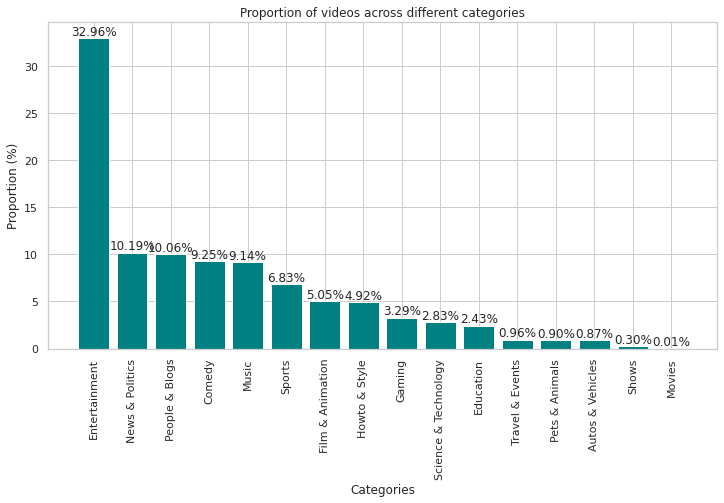

In [65]:
#The function creates a stacked bar chart to show the proportion of videos across different categories
def propotion_categories(dataframe):
    #Parameter: dataframe - the dataframe to be analyzed
    # Calculating proportions
    dataframe_frequency = dataframe['category_name'].value_counts()
    dataframe_proportions = dataframe_frequency / dataframe_frequency.sum() * 100
    
    # Prepare data for the bar chart
    categories = dataframe_proportions.index
    proportions_rounded = dataframe_proportions.round(2)

    plt.figure(figsize=(12, 6))
    bar = plt.bar(categories, proportions_rounded, color='teal')

    # Add the percentage above each bar
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='bottom')

    plt.xlabel('Categories')
    plt.ylabel('Proportion (%)')
    plt.title('Proportion of videos across different categories')
    plt.xticks(rotation=90)  
    plt.show()


propotion_categories(videoCat)

The bar chart above shows the proportion of videos in each category in descending order.

<h3> Objective 4.2: Do all YouTube channels post videos in one category, or do we have channels posting across diverse categories? </h3>

In [66]:
#The function analyses YouTube channels which posts across multiple categories
def top_diverse_channels(dataframe, top_n = 5):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: top_n - the number of channels to be displayed (default = 5)
    dataframe_channel_diversity = dataframe.groupby('channel_title')['category_name'].nunique()
    dataframe_top_diverse_channels = dataframe_channel_diversity.sort_values(ascending=False).head(top_n)
    return dataframe_top_diverse_channels

top_diverse_channels(videoCat)

channel_title
PewDiePie                 8
A Call For An Uprising    5
jacksepticeye             5
Trash                     5
Markiplier                5
Name: category_name, dtype: int64

The code output above lists the top 5 channels, which posts across several categories, in descending order of category counts.

<h3> Objective 4.3: Want to explore which YouTube content categories resonate more with the audience? </h3>

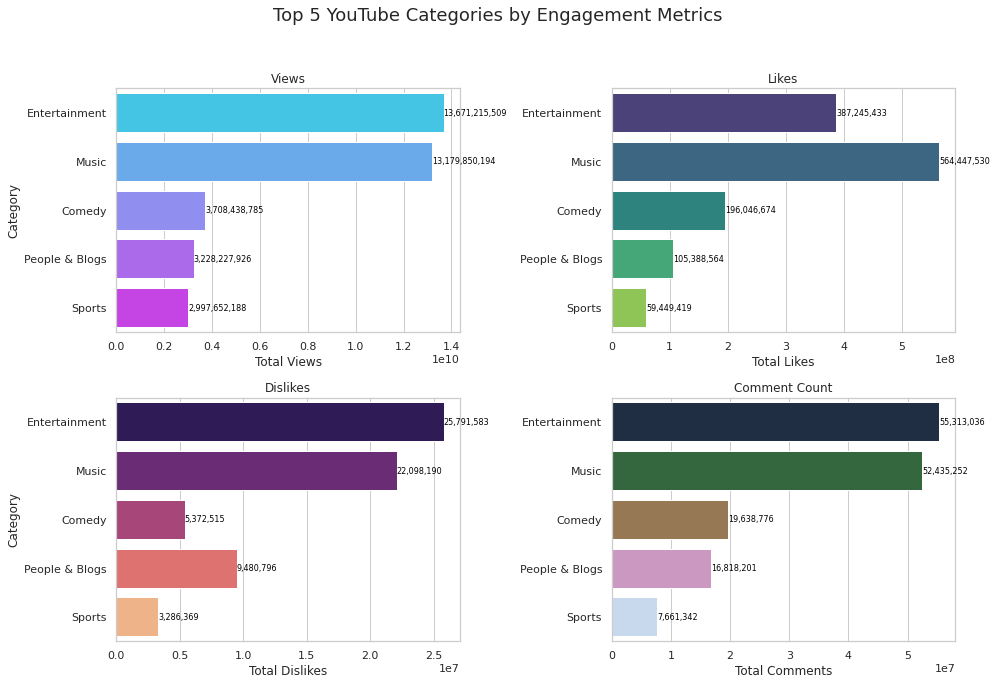

In [67]:
#The function analyses user engagement metrics like views, likes, dislikes, and comment counts 
#across different categories, in order to determine which categories are most engaging for viewers.

def engagement_metrics_categories(dataframe, top_n=5):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: top_n - the number of categories to be displayed (default = 5)
    engagement_metrics = dataframe.groupby('category_name').agg({
        'views': 'sum',
        'likes': 'sum',
        'dislikes': 'sum',
        'comment_count': 'sum'
    }).reset_index()
    engagement_metrics_sorted = engagement_metrics.sort_values(by='views', ascending=False)
    
    top_categories = engagement_metrics_sorted.head(top_n)
    categories = top_categories['category_name']
    views = top_categories['views']
    likes = top_categories['likes']
    dislikes = top_categories['dislikes']
    comments = top_categories['comment_count']

    sns.set(style="whitegrid")
    # Creating a subplot for each engagement metric
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Top {top_n} YouTube Categories by Engagement Metrics', fontsize=18)

    def add_labels(ax, data, fontsize=8):
        for index, value in enumerate(data):
            ax.text(value, index, f'{value:,}', va='center', ha='left', fontsize=fontsize, color='black')

    
    ax_view = sns.barplot(ax=axes[0, 0], x=views, y=categories, palette='cool')
    axes[0, 0].set_title('Views')
    axes[0, 0].set_xlabel('Total Views')
    axes[0, 0].set_ylabel('Category')
    add_labels(ax_view, views)

    
    ax_likes = sns.barplot(ax=axes[0, 1], x=likes, y=categories, palette='viridis')
    axes[0, 1].set_title('Likes')
    axes[0, 1].set_xlabel('Total Likes')
    axes[0, 1].set_ylabel('')
    add_labels(ax_likes, likes)

    
    ax_dislikes = sns.barplot(ax=axes[1, 0], x=dislikes, y=categories, palette='magma')
    axes[1, 0].set_title('Dislikes')
    axes[1, 0].set_xlabel('Total Dislikes')
    axes[1, 0].set_ylabel('Category')
    add_labels(ax_dislikes, dislikes)

    
    ax_comments = sns.barplot(ax=axes[1, 1], x=comments, y=categories, palette='cubehelix')
    axes[1, 1].set_title('Comment Count')
    axes[1, 1].set_xlabel('Total Comments')
    axes[1, 1].set_ylabel('')
    add_labels(ax_comments, comments)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


engagement_metrics_categories(videoCat)


The visualisation above provies the top 5 categories by engagement metrics.

*Bar graphs are great for showing discrete data, like the total or average values of a metric across categories. However, they do not reveal anything about the data's distribution beyond the mean or sum.*
*Boxplots excel at showing the distribution of data. Box plots display the median, quartiles, and outliers, providing a comprehensive view of the data's spread, central tendency, and variability. This is particularly useful for engagement metrics, which often have a wide range and outliers due to viral videos.*

Hence, plotting the box plots across user metrics with the option of choosing which categories are to be viewed

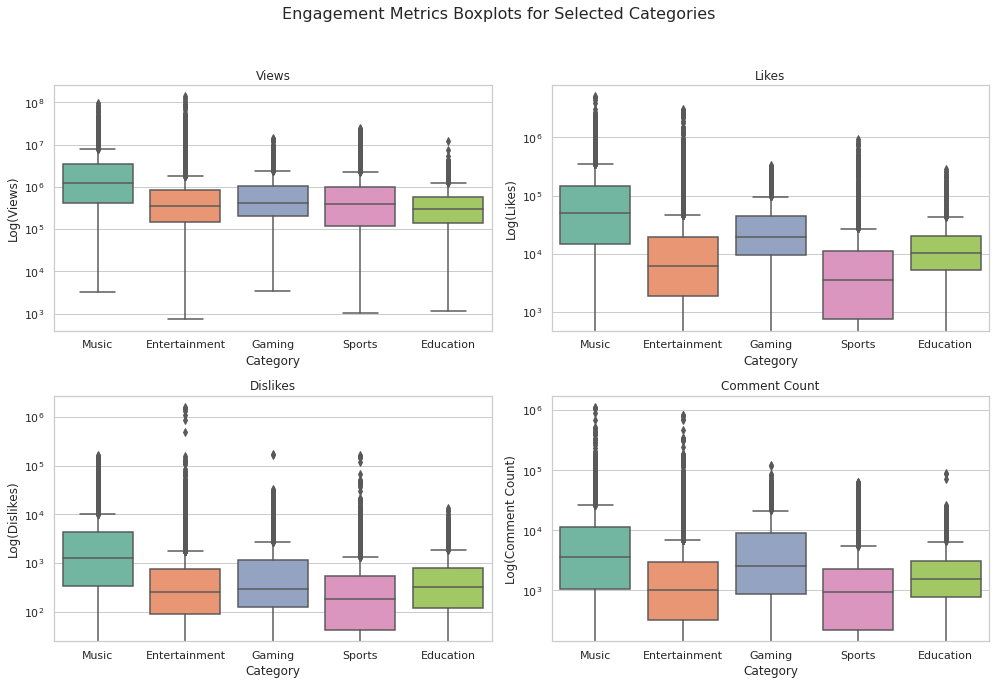

In [68]:
#The function plots the boxplots for engagement metrics across selected categories
def engagement_metrics_boxplots(dataframe, categories):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: categories - the list of categories to be plotted
    
    filtered_data = dataframe[dataframe['category_name'].isin(categories)]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Engagement Metrics Boxplots for Selected Categories', fontsize=16)

    # Views Boxplot
    sns.boxplot(ax=axes[0, 0], x='category_name', y='views', data=filtered_data, palette='Set2')
    axes[0, 0].set_title('Views')
    axes[0, 0].set_yscale('log')  # Log scale for better visualization
    axes[0, 0].set_ylabel('Log(Views)')
    axes[0, 0].set_xlabel('Category')

    # Likes Boxplot
    sns.boxplot(ax=axes[0, 1], x='category_name', y='likes', data=filtered_data, palette='Set2')
    axes[0, 1].set_title('Likes')
    axes[0, 1].set_yscale('log')
    axes[0, 1].set_ylabel('Log(Likes)')
    axes[0, 1].set_xlabel('Category')

    # Dislikes Boxplot
    sns.boxplot(ax=axes[1, 0], x='category_name', y='dislikes', data=filtered_data, palette='Set2')
    axes[1, 0].set_title('Dislikes')
    axes[1, 0].set_yscale('log')
    axes[1, 0].set_ylabel('Log(Dislikes)')
    axes[1, 0].set_xlabel('Category')

    # Comment Count Boxplot
    sns.boxplot(ax=axes[1, 1], x='category_name', y='comment_count', data=filtered_data, palette='Set2')
    axes[1, 1].set_title('Comment Count')
    axes[1, 1].set_yscale('log')
    axes[1, 1].set_ylabel('Log(Comment Count)')
    axes[1, 1].set_xlabel('Category')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


categories = ['Music', 'Entertainment', 'Gaming', 'Education', 'Sports']
engagement_metrics_boxplots(videoCat, categories)

The boxplot visualisation above provies a comprehensive view of audeince interaction patterns across the chosen categories.

<h3> Objective 4.3.1: Can we calculate the audience perception more holistically? </h3>

<h3> Objective 4.3.1.1: The Likes-Dislikes Ratio </h3>

The "like" to "dislike" ratio on YouTube refers to the number of "likes" a video has received compared to the number of "dislikes." This ratio is often used as a measure of the video's popularity and audience approval.

When viewers watch a video on YouTube, they have the option to express their opinion by clicking the "like" button (a thumbs-up icon) if they enjoyed the video or found it useful, or the "dislike" button (a thumbs-down icon) if they didn't like the video or found it unhelpful. These actions are a way for viewers to provide feedback to the content creator and to signal to other potential viewers whether the video is worth watching.

The like-to-dislike ratio can vary widely from video to video. A high like-to-dislike ratio, with a significant number of likes compared to dislikes, generally indicates that the video is well-received and has a positive audience response. Conversely, a low like-to-dislike ratio, with more dislikes than likes, may suggest that the video is unpopular or controversial.

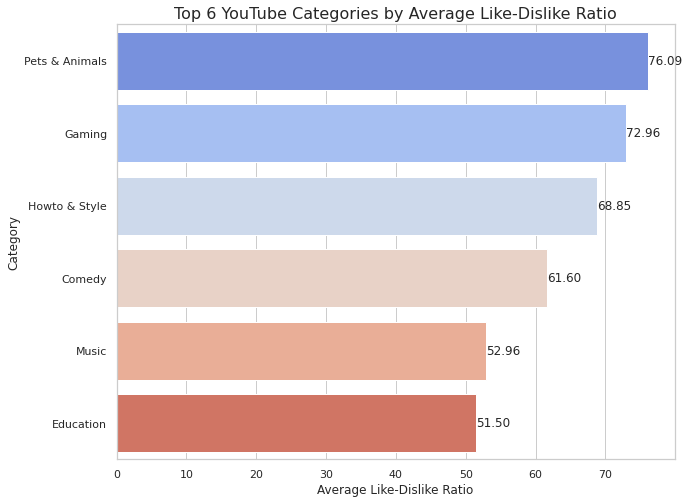

In [69]:
#The function calculates and plots the average like-dislike ratio for each category

#We may encounter a zero error when calculating the average like-dislike ratio for certain entries, 
#which arises if some videos have zero dislikes. This results in a mathematical error. For this, we are assigning
#a NaN value for videos where dislike count is zero, while computing the average/mean while ignoring such values.

def top_like_dislike_ratios(dataframe, top_n=5):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: top_n - the number of categories to be displayed (default = 5)

    # Calculating the like-dislike ratio with a check to avoid division by zero
    dataframe['like_dislike_ratio'] = dataframe.apply(lambda x: x['likes'] / x['dislikes'] if x['dislikes'] > 0 else float('nan'), axis=1)

    like_dislike_ratio = dataframe.groupby('category_name')['like_dislike_ratio'].mean().reset_index()

    # Removing NaN values and sorting to get the top N categories
    top_like_dislike_ratio = like_dislike_ratio.dropna().sort_values(by='like_dislike_ratio', ascending=False).head(top_n)

    # Creating a bar plot for like-dislike ratios for the top N categories
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(x='like_dislike_ratio', y='category_name', data=top_like_dislike_ratio, palette='coolwarm')

    for p in barplot.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), va='center')

    plt.title(f'Top {top_n} YouTube Categories by Average Like-Dislike Ratio', fontsize=16)
    plt.xlabel('Average Like-Dislike Ratio')
    plt.ylabel('Category')

    plt.show()

top_like_dislike_ratios(videoCat, top_n=6)

The visualisation above calculates the likes to dislikes ratio of top 6 categories.

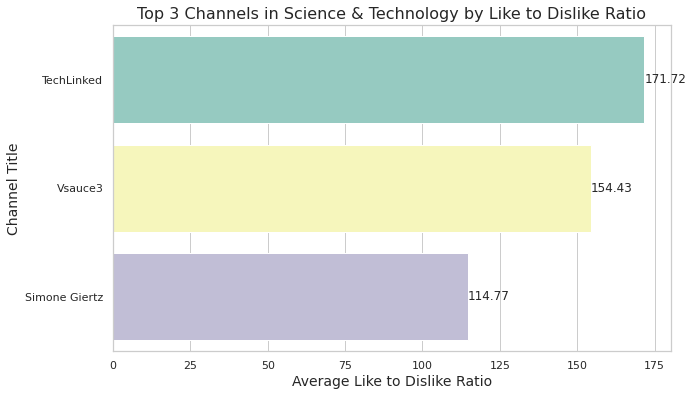

In [70]:
#Function Call finds the top N channels with the highest average like-dislike ratios

def top_channels_in_category_by_like_to_dislike_ratio(dataframe, category, top_n=3):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: category - the category for which the analysis is to be performed
    #Parameter: top_n - the number of channels to be displayed (default = 3)

    if category not in dataframe['category_name'].unique():
        raise ValueError(f"Category '{category}' not found in the dataset.")

    # Calculating the like to dislike ratio for each channel in the specified category
    category_data = dataframe[dataframe['category_name'] == category]
    # Avoid division by zero by adding a small number to dislikes
    category_data['like_to_dislike_ratio'] = category_data['likes'] / (category_data['dislikes'] + 1)

    top_channels = category_data.groupby('channel_title')['like_to_dislike_ratio'].mean().reset_index()

    top_channels = top_channels.nlargest(top_n, 'like_to_dislike_ratio')

    # Creating a bar plot for the top channels in the category with values on each bar
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='like_to_dislike_ratio', y='channel_title', data=top_channels, palette='Set3')

    for p in barplot.patches:
        plt.text(p.get_width(), p.get_y() + p.get_height() / 2, '{:,.2f}'.format(p.get_width()), va='center')

    plt.title(f'Top {top_n} Channels in {category} by Like to Dislike Ratio', fontsize=16)
    plt.xlabel('Average Like to Dislike Ratio', fontsize=14)
    plt.ylabel('Channel Title', fontsize=14)

    plt.show()

#Plotting the top 3 channels in the 'Science & Technology' category with values
top_channels_in_category_by_like_to_dislike_ratio(videoCat, 'Science & Technology', top_n=3)

The visualisation above provides the top 3 channels in 'Science & Technology' Category by likes-dislikes ratio.

**Note:**
*The approach to handling cases with zero dislikes (or other potentially zero denominators) can vary based on the specific context and objective of the analysis.*

*(a) While looking at the top n categories in terms of like-dislike ratio, the focus was on the overall category performance. Using NaN for categories with zero dislikes helps maintain the integrity of the average calculation across a large dataset. Categories with many videos are less likely to be significantly impacted by a few NaN values.The purpose here is to get a broad view of the category's performance as a whole. Excluding a few videos (by assigning NaN where dislikes are zero) doesn't significantly skew the category's average ratio.*

*(b) While looking at channels under each category (more granular analysis), every video counts significantly towards the channel's overall performance. Excluding videos with zero dislikes by using NaN could unfairly impact a channel's calculated ratio, especially if the channel doesn't have a large number of videos. Adding a small constant (like 0.01) to the denominator in these cases ensures that every video is included in the calculation. This method provides a more comprehensive and fair assessment of each channel's performance.*

<h3> Objective 4.3.1.2: Comment-Views Engagement </h3>

Comment-to-view engagement is a ratio that measures the proportion of comments relative to the total number of views a video has received. It tells us how engaged the viewers are in relation to the overall reach of the video. This metric provides a sense of how effectively a video is at encouraging viewer interaction and sparking discussions among those who watch it.

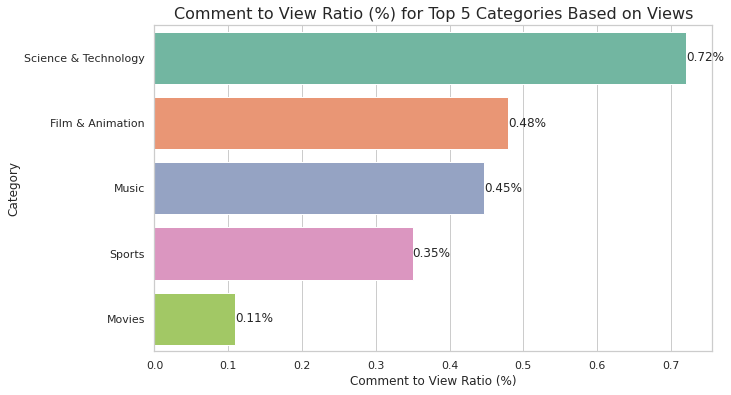

In [71]:
#The function calculates and plots the average comment to view ratio for top N categories

def comment_to_view_ratio(dataframe, top_n=5):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: top_n - the number of categories to be displayed (default = 5)

    avg_views = dataframe.groupby('category_name')['views'].mean().reset_index()

    top_categories = avg_views.sort_values(by='views', ascending=False).head(top_n)['category_name']

    filtered_data = dataframe[dataframe['category_name'].isin(top_categories)]

    # Calculating the comment to view ratio as a percentage
    filtered_data['comment_to_view_ratio'] = (filtered_data['comment_count'] / filtered_data['views']) * 100

    sorted_data = filtered_data.groupby('category_name')['comment_to_view_ratio'].mean().reset_index()
    sorted_data = sorted_data.sort_values(by='comment_to_view_ratio', ascending=False)

    # Creating a bar plot for the comment to view ratio percentage in descending order
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='comment_to_view_ratio', y='category_name', data=sorted_data, palette='Set2')

    for p in barplot.patches:
        plt.text(p.get_width(), p.get_y() + p.get_height() / 2, '{:,.2f}%'.format(p.get_width()), va='center')

    plt.title(f'Comment to View Ratio (%) for Top {top_n} Categories Based on Views', fontsize=16)
    plt.xlabel('Comment to View Ratio (%)')
    plt.ylabel('Category')

    plt.show()


comment_to_view_ratio(videoCat, top_n=5)


The visualisation above provide the comment to view ratio as a percentage for the top 5 categories in descending order with values

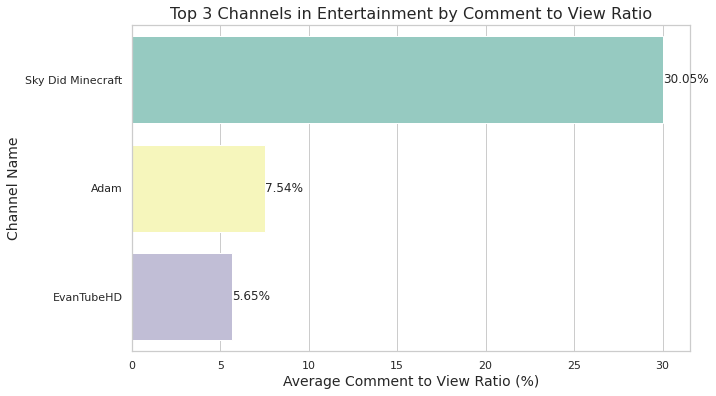

In [72]:
#The function calculates the top n channels in terms of comment to view ratio category wise

def top_channels_in_category_by_comment_to_view_ratio(dataframe, category, top_n=3):
    #Parameter: dataframe - the dataframe to be analyzed
    #Parameter: category - the category for which the analysis is to be performed
    #Parameter: top_n - the number of channels to be displayed (default = 3)
    # Checking if the category exists in the dataframe
    if category not in dataframe['category_name'].unique():
        raise ValueError(f"Category '{category}' not found in the dataset.")

    # Calculating the comment to view ratio for each channel in the specified category
    category_data = dataframe[dataframe['category_name'] == category]
    category_data['comment_to_view_ratio'] = (category_data['comment_count'] / category_data['views']) * 100

    top_channels = category_data.groupby('channel_title')['comment_to_view_ratio'].mean().reset_index()

    top_channels = top_channels.nlargest(top_n, 'comment_to_view_ratio')

    # Creating a bar plot for the top channels in the category with values on each bar
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='comment_to_view_ratio', y='channel_title', data=top_channels, palette='Set3')

    for p in barplot.patches:
        plt.text(p.get_width(), p.get_y() + p.get_height() / 2, '{:,.2f}%'.format(p.get_width()), va='center')

    plt.title(f'Top {top_n} Channels in {category} by Comment to View Ratio', fontsize=16)
    plt.xlabel('Average Comment to View Ratio (%)', fontsize=14)
    plt.ylabel('Channel Name', fontsize=14)

    plt.show()


top_channels_in_category_by_comment_to_view_ratio(videoCat, 'Entertainment', top_n=3)


The visualsiation above provides the top 3 channels in the 'Entertainment' category with values

# **Project Outcome**

## Objective 1 How does factor like tags, title and description effect trending of videos?

## Objective 1.1 How tags affect videos?

### Objective 1.1.1 : Does having tags in video help it to trend??

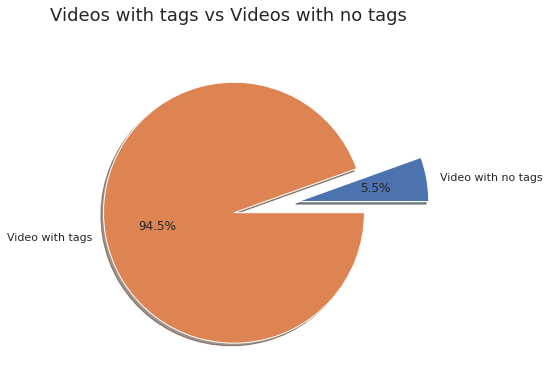

In [73]:
## pie chart representing ratio of trending videos with tags vs videos without tags
pieChartTag()

### Objective 1.1.2 : Most common tags used across trending videos!!

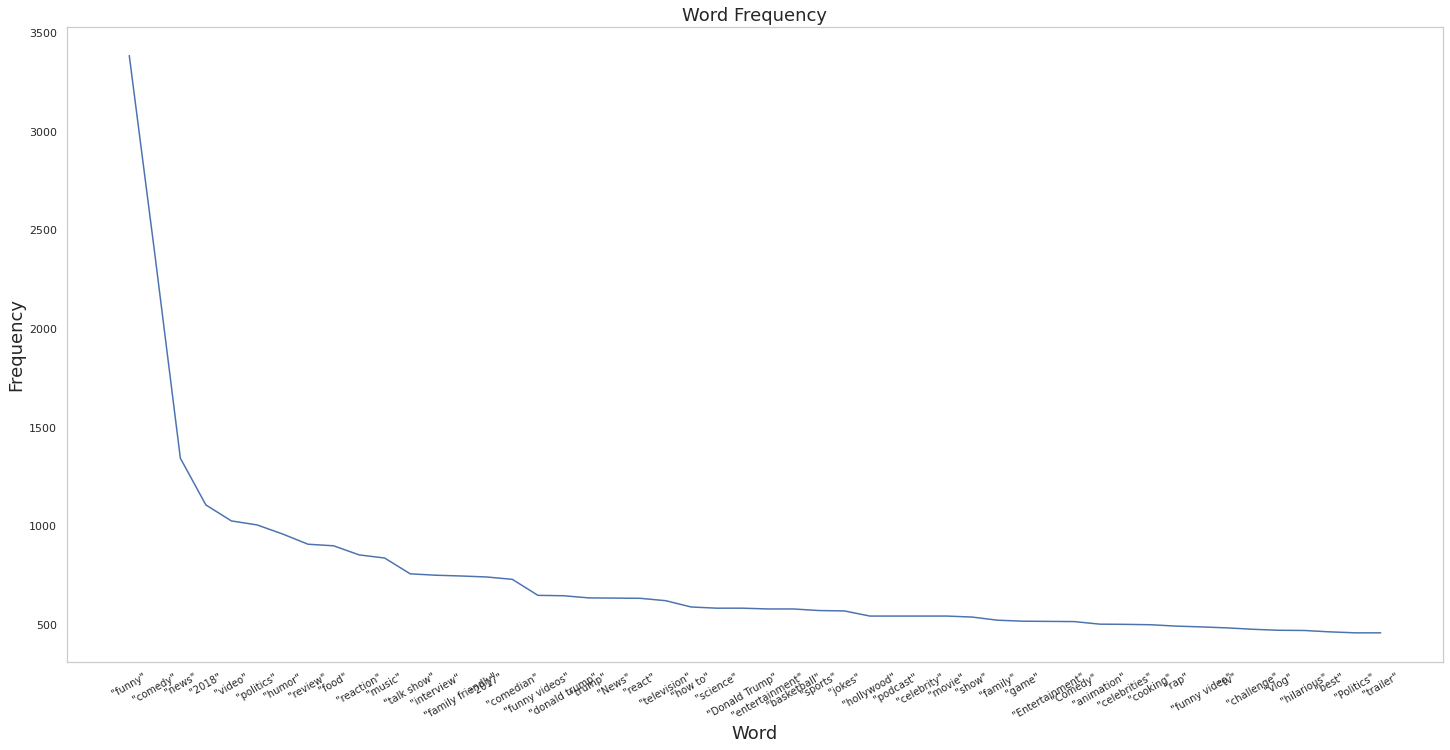

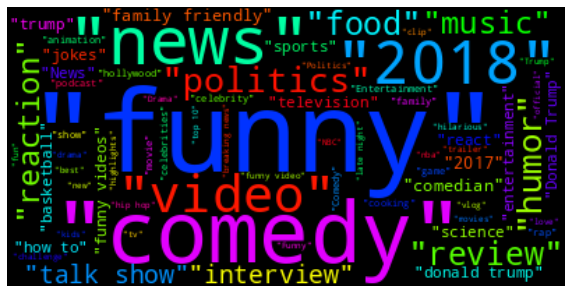

In [74]:
## Which specific tags were trending
wordFrequencyGraph()
wordCloud()

### Explanation of Objective 1.1

As per the above observation, we see the below insights:
-  We see that around **94.5%** of trending videos have tags linked to them; hence we can conclude that tagging videos helps a lot!
-  *"funny"* seems to be the dominant tag, as seen through the frequency chart and word cloud. "funny" is followed by "comedy" tags, which show the influence of humour in the world of YouTube videos.

## Objective 1.2 How title of video affect video?

### Objective 1.2.1 : Do you Like long youtube title or short?? Lets see what other thinks!!

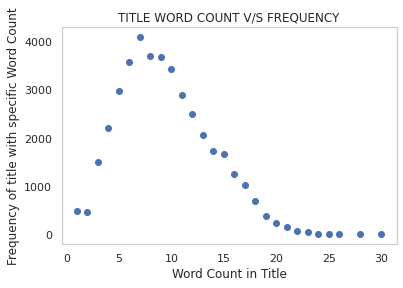

In [75]:
## Graph representing word count in title V/S frequencey of word count
wordFrequency()

From the above observation, we can find that, on average, *6 to 9 words per title* is good enough. When we see more words, it leads to an overly complicated title, which tends to decrease in popularity of videos. We see that 7 words per title has the maximum number of videos trending.

### Objective 1.2.2 : Ever thought which of these video title would be trending Click-Bait, Question, Statement

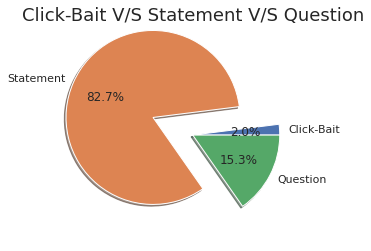

In [76]:
## pie chart represent distribution of title among category of click-bait, question, and statement
titleType()

From the above pie chart, having a click-bait title does not necessarily lead to trending videos, as only 2% of the videos trend with a click-bait title. We see a statement in the title has the highest chance to trend.

### Explanation of Objective 1.2

As per above obervation we see below insights:
- On average 6 to 9 words per title is a goo length of title for a youtube video. We also see more words leading to complex titles, which tends to decrease popularity of videos
- We also see a **statement type of title works best around 83% of trending videos** were classified as statement, unlike what is believed click-bait vidoes do well, data says otherwise.

## Objective 1.3 : Curious on what to put as description??

### Objective 1.3.1 : Does having links in description helps videos to trend ? If so how many? 

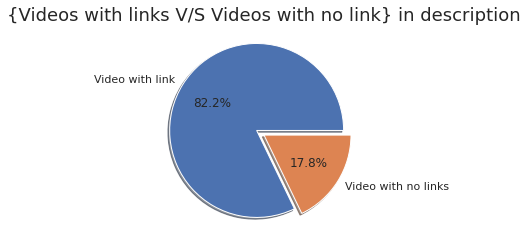

In [77]:
# pie chart representing if having links in description helps
pieChartDescriptionLink()

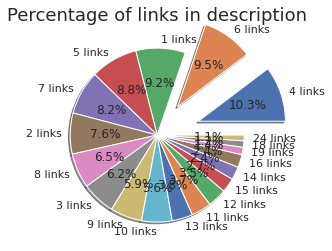

<Figure size 1440x1440 with 0 Axes>

In [78]:
# char representing percentage of links in description across videos 
pieChartDescriptionLinks()

From above two charts, we can see that having a link helps videos follow trends, as around **83% trending videos has link in their description**. Also **4 to 6 links per video description** are very common.

### Objective 1.3.1 : Ever thought if trending video is influenced on whether a Eighth grade can understand its description after single read!!

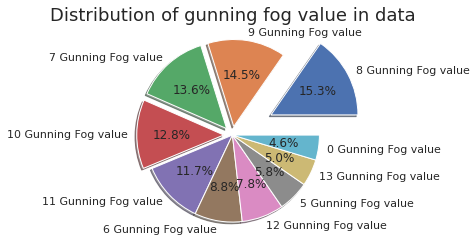

<Figure size 1152x1440 with 0 Axes>

In [79]:
# the chart represent how gunning fog valus is spread across the data 
pieChartGunningValue()

The readability of the description always plays an important role; most of the video targets eight-year-olds to high school seniors, and the level of English is kept simple.


### Objective 1.3.1 : Does asking for Like, Subscribe or Share really helps in trending of videos ??? 

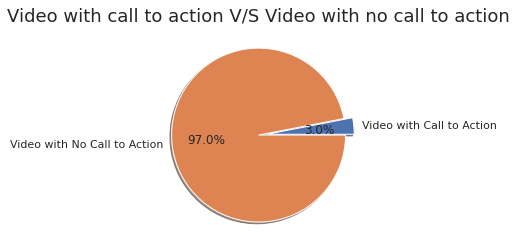

In [80]:
## graph representing call to action in video description
piechartCallToAction()

From above, we can see there is no direct association between the inclusion of a call to action (CTA) in descriptions and video trends. A substantial 97% of videos lack a call to action in their descriptions, indicating that the trending status of a video may be influenced by factors beyond explicit prompts for viewer engagement.

### Explanation of Objective 1.3

From our Analysis we conclude that a video description should contain 4 to 6 links with eight grade level of english and there is no direct relation between call to action and trending ov videos

### Explanation of Objective 1

In summary, the analysis of trending YouTube videos underscores the pivotal role of video tags, with approximately 94.5% of popular videos utilising this feature. The prevalence of tags such as "funny" and "comedy" highlights humour's dominant influence on video trends.

Optimal video titles, averaging 6 to 9 words, strike a balance between conciseness and complexity, challenging the belief that longer, click-bait titles are essential. Statement-type titles, constituting around 83% of trending videos, demonstrate the effectiveness of straightforward and informative titles.

The presence of links in video descriptions is a significant factor, with about 83% of trending videos featuring them. Maintaining a balance of 4 to 6 links per video description appears common and contributes to a video's likelihood of trending.

Readability is crucial, with content targeting eighth graders to high school sophomores. Despite the prevalent absence of explicit calls to action (97% of videos lack a CTA), other factors seem more influential in determining a video's trending status.

## Objective 2 : Temporal Analysis of Trending Videos on YouTube

### Explanation of Objective 2.1 : Analyzing the Time-to-Trend for Videos Based on Category

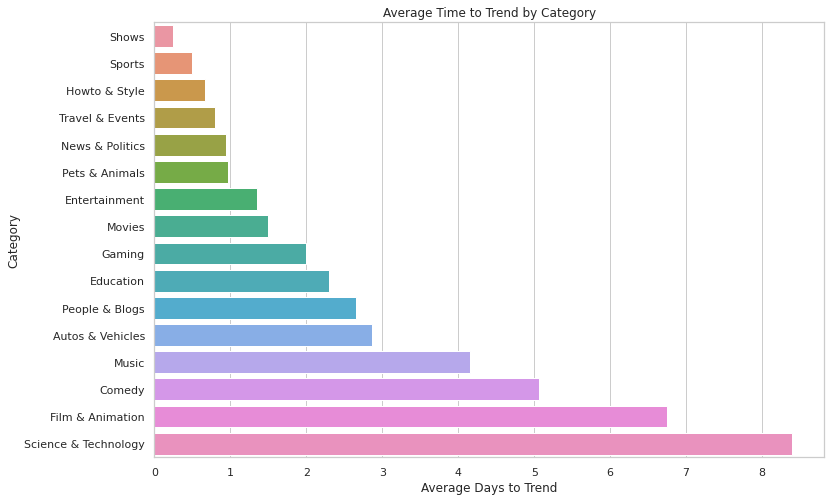

In [81]:
# Average Time to Trend by Category
categoryTrendTime()

According to the data depicted in the graph, there is a noticeable distinction in the speed at which videos become popular, with genre being a crucial factor. It is evident that shows and sports footage take the lead in trending, while science and technology videos lag behind. Numerous factors may contribute to this, such as the relevance of the content to current events and mainstream interests, the magnitude and level of interaction from the viewers, and the overall quality and optimisation of the video. These findings highlight the intricate nature of online trends and the different components that can impact their success.

### Explanation of Objective 2.2 : Identifying the Hour of the Day with Maximum Engagement

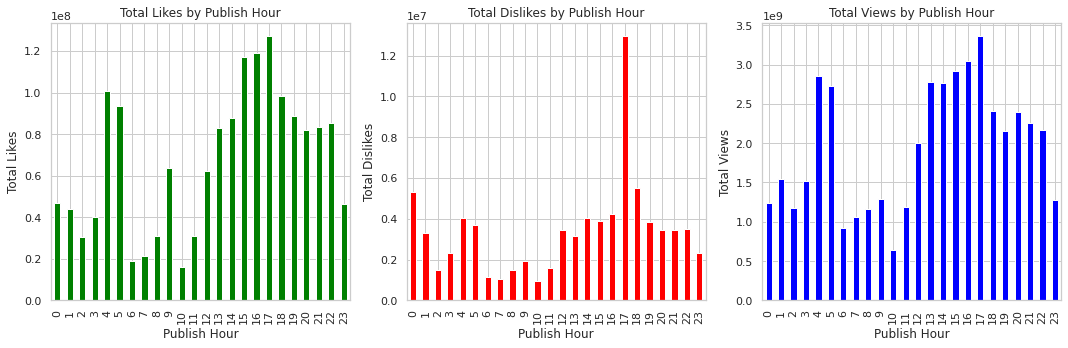

In [82]:
#Hour of the day with most engagement
publishHourEngagement()

The graphical data provided depicts the average hourly engagement levels on a given day, where negative and positive engagements are represented by dislikes and likes, respectively. Additionally, the graph also showcases the total view count for each hour. Upon closer examination, we can observe that the peak engagement for both negative and positive reactions is observed at 17:00, which coincides with the time when most individuals have concluded their work or schooling obligations. This points towards a trend where people are more inclined to browse through their social media feeds and interact with content during the later hours of the evening. After 17:00, there is a notable decline in the number of dislikes, while the volume of likes and views remains consistently high until the end of the day. Overall, the data analysis reveals that the highest levels of both positive and negative engagement, as well as the maximum number of views, occur during after-office hours, with a prominent peak at 17:00.

### Explanation of Objective 2.3 : Exploring the Relation Between Category and Trending Day

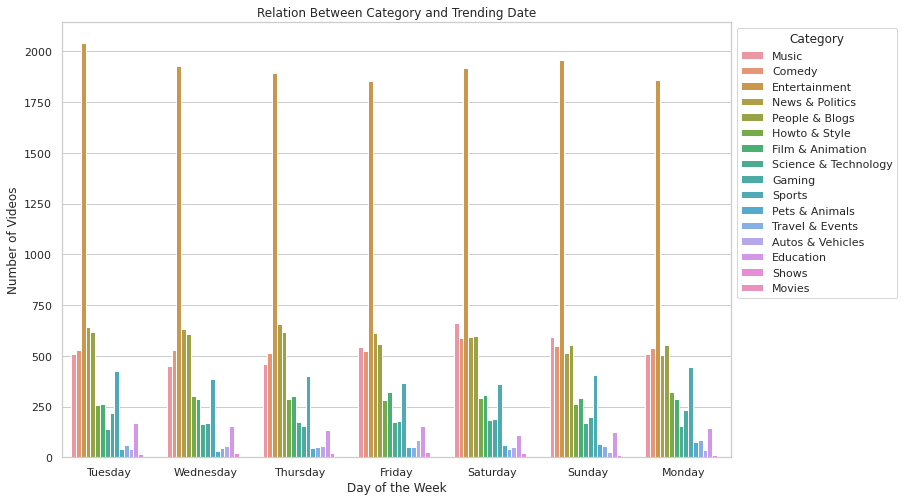

In [83]:
#Explore the Relation Between Category and Trending Day
categoryTrendDay()

The graph provided displays the weekly trend of videos for each category, revealing a clear frontrunner: entertainment. No matter the day, viewers consistently engage with entertainment content, making it the most sought-after category. Weekends seem to hold a special place for movies and shows, as they are more likely to trend during this time compared to weekdays. However, education, science and technology lag behind in the number of trending videos, holding steady throughout the week and experiencing a dip on the weekends. This highlights a preference for more lighthearted content rather than educational or scientific material, regardless of the day. This valuable insight can benefit businesses and individuals in creating targeted content strategies that effectively reach their intended audience.

<h3>Explanation of Objective 2 : Temporal Analysis of Trending Videos on YouTube</h3>

Through extensive research, this study has explored the intricacies of YouTube's trending videos, shedding light on the factors that contribute to their success and uncovering patterns in viewership behavior. 

Our analysis of the time it takes for videos to trend, the most engaging time of day, and the relationship between categories and trending days has provided valuable insights into the temporal dynamics of online content consumption.

Interestingly, our findings suggest that shows and sports videos have a higher likelihood of trending quickly, whereas science and technology videos tend to take longer to gain traction. This discrepancy can be attributed to the relevance of the content to current events and popular culture, as well as the size and engagement of the target audience. 

Our research also highlights the significance of time of day on engagement levels. Specifically, our data reveals a spike in both positive and negative engagement during the evening, peaking at 5 PM. This indicates that individuals are more likely to engage with content when they are feeling relaxed and have more leisure time. 

Additionally, our analysis consistently shows that entertainment content is the most popular genre, regardless of the day of the week. However, while movies and shows tend to see a surge in views on weekends, education and science and technology videos experience lower levels of engagement. 

These findings emphasize the importance of considering timing when it comes to creating and promoting content on YouTube. Creators can use this information to optimize their strategies and cater to viewers' preferences for when and how they engage with different types of content.

## Objective 3 : Check how engagement metrics are crucial for trending videos!!!

### Objective 3.1: Are factors like "likes", "dislikes","views","comment_count" correlated to each other?



The provided Python script manipulates a DataFrame, likely related to video data. It creates a new DataFrame, "videos," by copying an existing one. The script converts date and time columns to datetime format, extracts the hour of publication, adds a new column for the extracted hours, and creates a subset DataFrame named "newvideos" with selected columns. The final output displays the first five rows of this modified DataFrame, focusing on relevant video-related information.

                                        
#### correlation_matrix

The provided code calculates the correlation matrix for a subset of columns ("views," "likes," "dislikes," and "comment_count") in the DataFrame named newvideos. The correlation matrix provides information about the linear relationships between these variables.

In [84]:
# calculate the correlation coefficient
correlation_matrix = newvideos[["views","likes","dislikes","comment_count"]].corr()
correlation_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000



The provided table is a correlation matrix that shows the correlation coefficients between different pairs of variables: "views," "likes," "dislikes," and "comment_count." Correlation coefficients measure the strength and direction of a linear relationship between two variables, ranging from -1 to 1.


The correlation matrix reveals associations among various metrics in a dataset. Notably, a robust positive correlation of 0.83 exists between views and likes, indicating that as views increase, so do likes. Views also moderately correlate with dislikes (0.56) and strongly with comment count (0.69). Additionally, videos with more likes tend to have more comments (correlation of 0.84), while a moderate correlation of 0.46 suggests videos with more likes also have more dislikes. Similarly, a strong positive correlation (0.64) links the number of dislikes to the comment count. It's essential to recognise that correlation doesn't imply causation, and external factors may influence these observed relationships.



#### correlation graph

This function, "correlation_graph," creates a pairplot using Seaborn to visualize metric correlations in the DataFrame "newvideos." It offers a concise overview of variable relationships and distributions, enhancing understanding with a title, "Correlation Matrix."


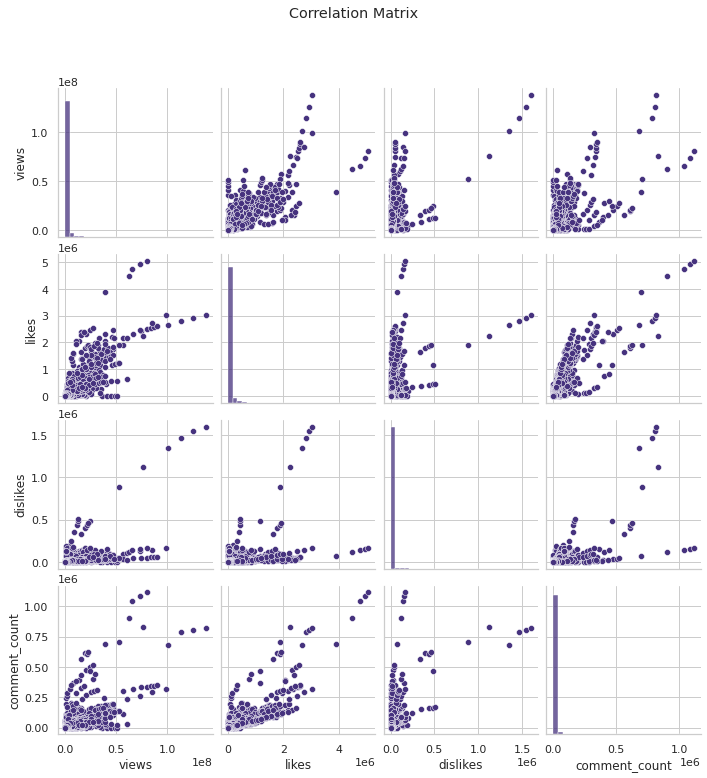

In [85]:
correlation_graph(newvideos)

<h3>Here is the result we can see in the graph: </h3>

 The scatterplot for "views" and "likes" is anticipated to reveal a strong positive correlation, illustrating that as views increase, likes also tend to increase. This relationship is expected to be visually evident with a discernible upward trend. Similarly, the scatterplot for "views" and "dislikes" should show a positive trend, though likely not as steep as the one between "views" and "likes." The scatterplots involving "likes" and "comment count," as well as "dislikes" and "comment count," are anticipated to exhibit very strong positive correlations, indicating that videos with more likes or dislikes also tend to have more comments. The diagonal histograms will provide insights into the distribution of each variable, offering a comprehensive view of their individual patterns and ranges. Overall, the pairplot would serve as a valuable visual tool to understand the interplay between these key variables.

<h3>correlation matrix using heatmap</h3>

This function, "correlation_matrix_heatmap," creates a heatmap to visualize a given correlation matrix using Seaborn and Matplotlib. It efficiently displays the relationships between variables with color-coded annotations.

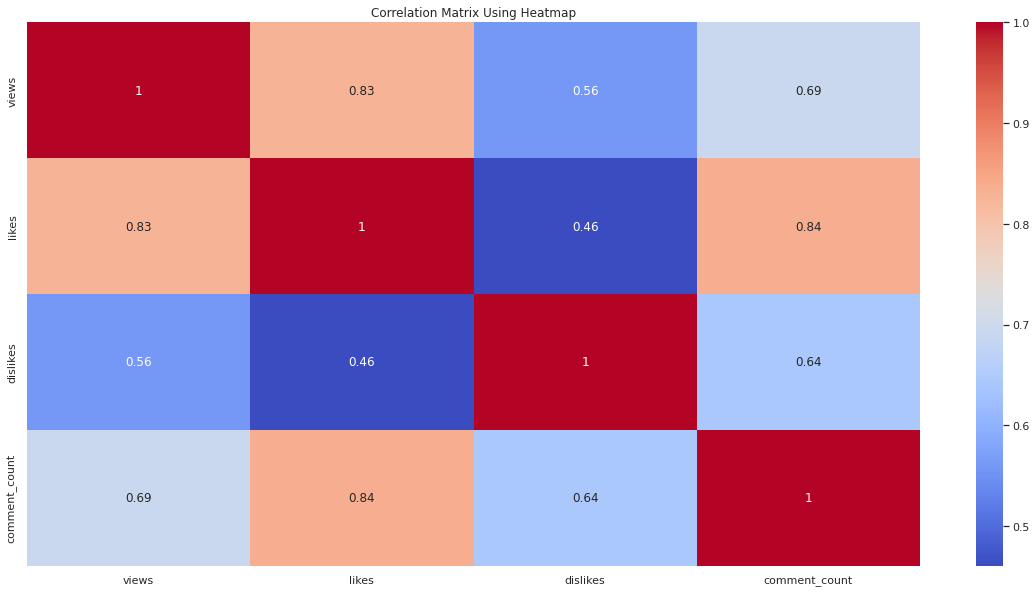

In [86]:
correlation_matrix_heatmap(correlation_matrix)

#### Here's an interpretation of the Heatmap

The correlation matrix unveils vivid patterns, with warm-colored cells representing the strength of relationships. In the top-left quadrant, the intersection of "Views" and "Likes" radiates a vibrant warm hue, signifying a high positive correlation coefficient of approximately 0.83. This warmth indicates a robust positive linear relationship—more views correspond strongly with more likes. Moving to the top-right quadrant, the cell at the intersection of "Views" and "Dislikes" features a moderately warm color (correlation of 0.56), suggesting a positive association, albeit not as intense as with likes. The bottom-left quadrant showcases a warm glow (correlation of 0.69) between "Views" and "Comment Count," underlining a strong positive correlation. Transitioning to the bottom-right quadrant, the cell at the intersection of "Dislikes" and "Comment Count" exudes a strong warm color (correlation of 0.64), revealing a robust positive linear relationship. These visual cues enhance our understanding of the relationships between views, likes, dislikes, and comment count in the dataset.


<h2>Objective 3.2: Does the time of publication impact a videos's popularity?</h2>

<h3>Distribution of Trending Videos by Publication Hour</h3>

This function, "trending_videos_by_publication_hour," takes a DataFrame named "videos" and creates a histogram to show the distribution of video publication hours. The resulting visual highlights when trending videos are typically published.

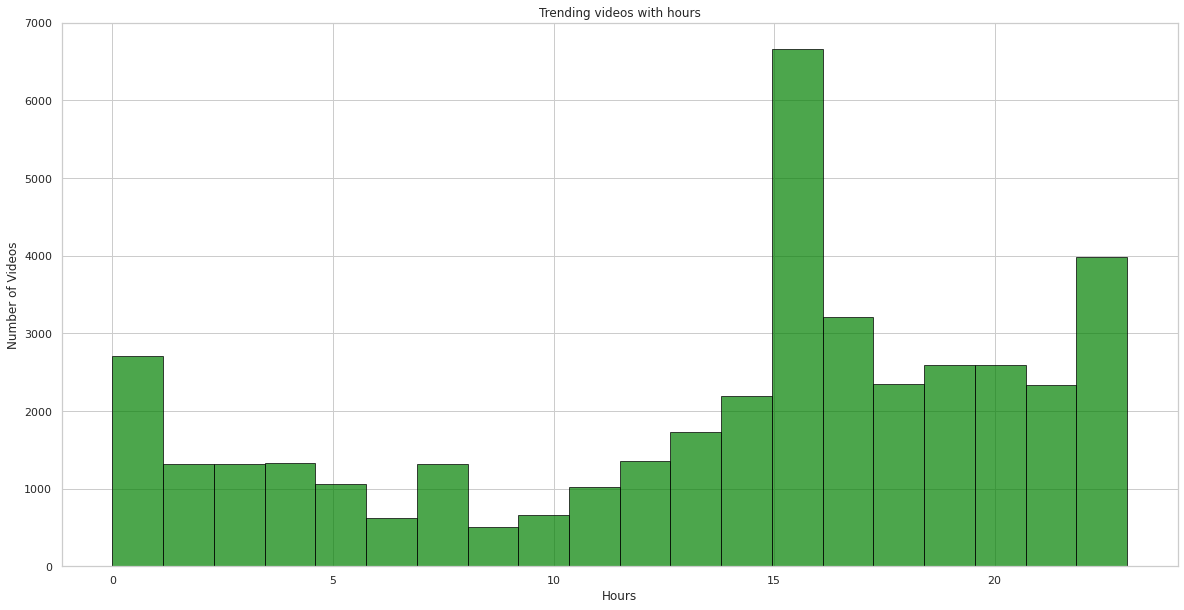

In [87]:
trending_videos_by_publication_hour(videos)

Based on the analysis of the provided data, it appears that the optimal time to post videos for a higher chance of trending is between 1 PM and 4 PM (13:00 to 16:00). During this time frame, there is a notable concentration of trending videos. This suggests that the audience engagement and visibility of videos tend to be higher during these afternoon hours.

<h2>Objective 3.3: Does turning off video ratings and comments impact the number of views and overall trendiness of videos?</h2>

<h3>Objective 3.3.1: Standard Statistics with Visualisations</h3>

In [88]:
grouped_data

,comments_disabled,ratings_disabled,average_views,total_videos
0,False,False,1.149223e+06,40082
1,False,True,4.045578e+05,216
2,True,False,8.523823e+05,520
3,True,True,4.733370e+06,63


The data summarises information about videos based on whether comments and ratings are turned on or off. Videos with both comments and ratings turned on have the most views on average (about 1.15 million) across 40,082 videos. Videos where only ratings are turned off, especially when comments are also off, have lower average views, with the lowest average (around 404,558) found in 216 videos. Videos with no comments but ratings on or off have average views in between, with the highest number of videos (520) when only comments are off. Interestingly, videos with both comments and ratings turned off have the highest average views (around 4.73 million), but there are fewer of these videos, just 63 in total.

<h3>Plotting the results</h3>

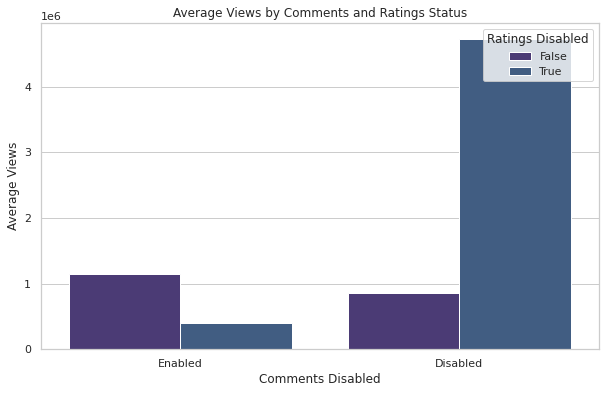

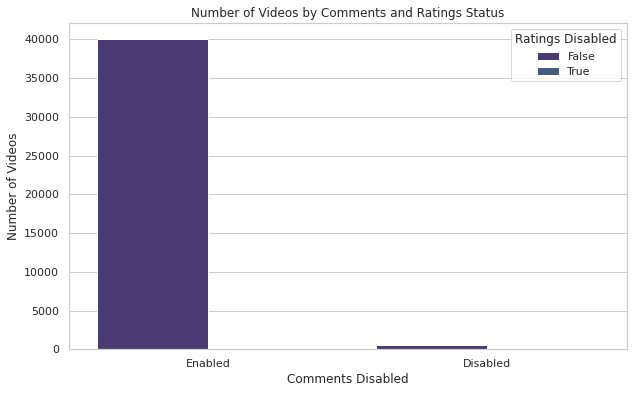

In [89]:
average_views_and_number_of_videos_by_comments_and_ratings_status(grouped_data)  

<h3>Average Views by Comments and Ratings Status:</h3>

The numbers show that videos get a lot of views when people can leave comments and give ratings (around 1,149,223 views). But if comments are allowed without ratings, the views drop a lot (about 404,558). Videos without comments but with ratings get around 852,382 views on average. Surprisingly, videos with neither comments nor ratings have a much higher view count (about 4,733,370). Most videos (40,082) let people comment and rate, while a small number only allow comments (216 videos) or only allow ratings (520 videos). Videos with neither comments nor ratings are very few (63 videos). Even though videos with no comments and ratings get a lot of views on average, they make up a tiny part of all videos. This might be because a few videos with super high views are influencing the average. Most videos stick to the usual way of allowing both comments and ratings.

<h3>Objective 3.3.2: Distribution of Views for Different Combinations of Comments and Ratings Status</h3>

First creates a new column 'Status Combination'
For example, if a row has comments_disabled as False and ratings_disabled as True, the lambda function will produce the string 'Comments Enabled - Ratings Disabled' for that row.

Plotting boxplots for distribution of views

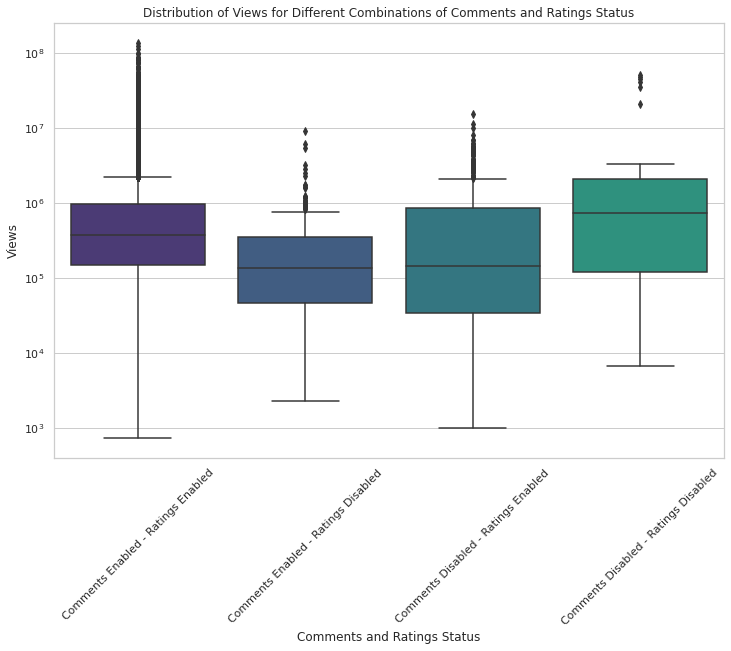

In [90]:
distribution_of_views_for_combinations_of_comments_ratings_status(videos)  

From the plot, we can observe the following:

The boxplot effectively visualises the distribution of average views across various video categories determined by comments and ratings status. Videos permitting both comments and ratings exhibit a noteworthy average view count of approximately 1,149,223, with indications of potential outliers contributing to exceptionally high views. In contrast, videos allowing comments only show a lower average view count, averaging around 404,558. Videos permitting ratings only fall in between, with an average view count of about 852,382. Strikingly, videos with neither comments nor ratings boast a significantly higher average view count, reaching around 4,733,370. While this suggests a more concentrated distribution of high views, the presence of outliers, particularly in the category of videos without comments and ratings, implies the influence of a few videos on the overall high average. Despite the notable average view count for videos without comments and ratings, their representation is minimal, constituting only 63 videos, reinforcing the prevalence of the conventional approach of allowing both comments and ratings in the majority of videos.


<h3> Explanation of Objective 3: </h3>

In summary, successful YouTube videos tend to have a positive correlation between views, likes, and comments, emphasizing the importance of engaging content. Strategic timing, particularly between 1 PM and 4 PM, enhances the likelihood of a video trending. While videos with disabled comments and ratings show a high average view count, their infrequent occurrence suggests potential outlier influence. Overall, creators should prioritize audience engagement, strategic timing, and a balance between comments and ratings for optimal video performance on the platform.

<h2> Objective 4: How do categories affect the user engagement? </h2>

<h3> Objective 4.1: Curious to see which categories have the most number of trending videos? </h3>

In [91]:
#Frequency analysis of categories with video counts

frequency(videoCat)

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: category_name, dtype: int64

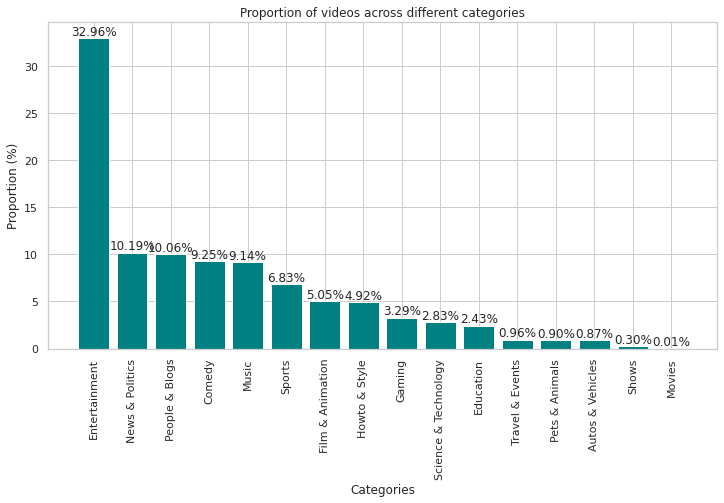

In [92]:
#Proportion Analysis of categories with video counts

propotion_categories(videoCat)

<h3> Explanation of Objective 4.1: </h3>

The above two outputs showcase that 'Entertainment' category represents approximately 32.96% (13,451 videos listed under the category) of the dataset, which makes it the most dominant category, followed by 'News & Politics' , 'People & Blogs' and so on. At the other end of the spectrum, categories such as 'Shows' and 'Movies' reprsents a mere 0.30% and 0.01% of the dataset, which is an indication of its rarity on the platform. This can be attributed to the Production Companies usually not uploading their episodes/movies for free on YouTub, and would usually take down such content uploaded by third-party channels under the copyright laws.

<h2> Objective 4.2: Do all YouTube channels post videos in one category, or do we have channels posting across diverse categories? </h2>

In [93]:
#YouTube channels which post across multiple categories

top_diverse_channels(videoCat, top_n = 5)

channel_title
PewDiePie                 8
A Call For An Uprising    5
jacksepticeye             5
Trash                     5
Markiplier                5
Name: category_name, dtype: int64

<h3> Explanation of Objective 4.2: </h3>

The output above reveals top 5 channels with the broadest range of content, demonstrating their diversity in terms of video categories, where channels like 'PewDiePie' and 'A Call for An Uprising' uploads across 8 and 5 categories. The top_n value can be changed to view the other channels down the line.

<h3> Objective 4.3: Want to explore which YouTube content categories resonate more with the audience? </h3>

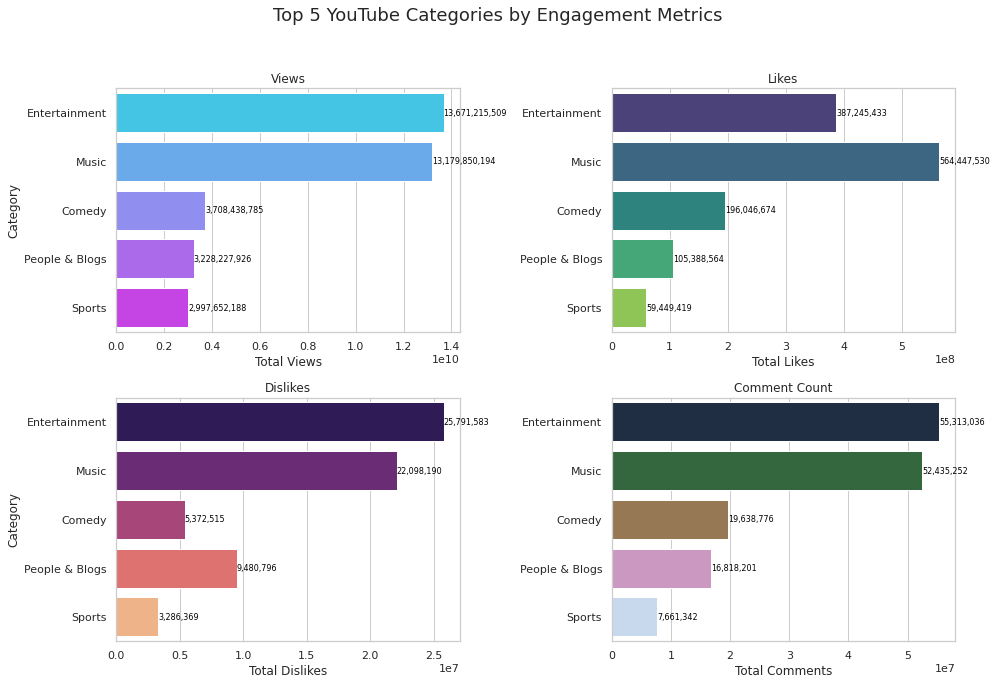

In [94]:
#Top 5 categories with the highest engagement metrics in terms of likes, dislikes, views, and comments counts

engagement_metrics_categories(videoCat, top_n=5)

From the visualisation above, it can be observed that In summary, YouTube's most engaging content categories are Entertainment, Music, Comedy, People & Blogs, and Sports. These insights highlight the diverse appeal of these categories and their ability to capture viewers' attention and interaction on the platform. However, instead of bar charts, box plots would show us a more comprehensive view of the dataset.

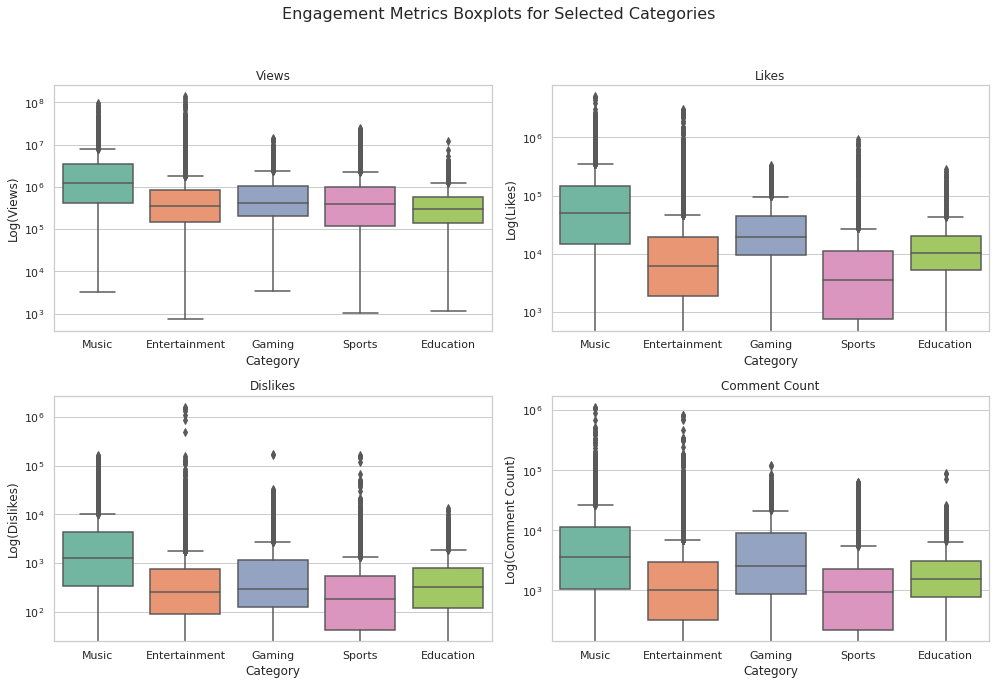

In [95]:
#Boxplots for distribution of engagement metrics across selected categories (it gives the user of this code the freedom to choose the categories)

#Selecting the categories to visualize
categories = ['Music', 'Entertainment', 'Gaming', 'Education', 'Sports']
engagement_metrics_boxplots(videoCat, categories)

The boxplot visualisation of engagement metrics across YouTube categories reveals a comprehensive picture of audience interaction patterns. It highlights significant variations in views, likes, and dislikes, across categories showcasing diverse content popularity. Comment counts spread across categories, reflecting varying levels of engagement and conversation. The presence of outliers in views, likes, and dislikes signifies exceptionally well-performing or controversial videos or viral videos. For content creators and advertisers, this information can guide strategies by targeting categories with high engagement, while recognizing the specific audience dynamics within each category.

<h3> Objective 4.3.1: Can we calculate the audience perception more holistically? </h3>

<h3> Objective 4.3.1.1: The Likes to Dislikes Ratio </h3>

The Likes to Dislikes Ratio is a more holistic metric to look into audience perception towards YouTube videos. A high like-to-dislike ratio, with a significant number of likes compared to dislikes, generally indicates that the video is well-received and has a positive audience response. Conversely, a low like-to-dislike ratio, with more dislikes than likes, may suggest that the video is unpopular or controversial.

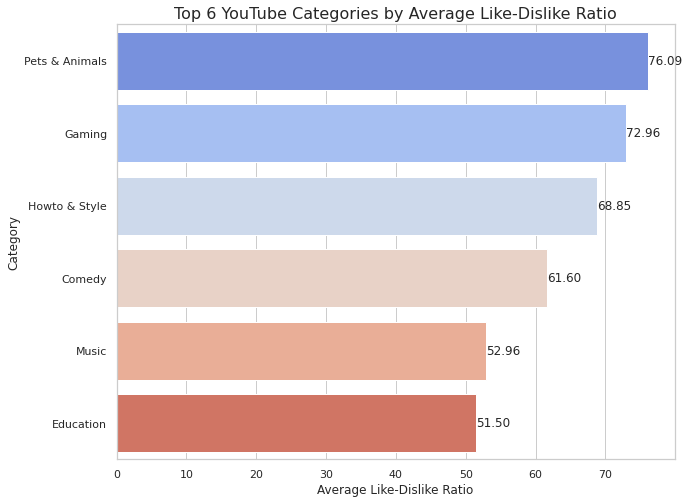

In [96]:
#Top 6 categories with the highest average like-dislike ratios
top_like_dislike_ratios(videoCat, top_n=6)

The visualisation above provides the top 6 categories with the highest likes to dislikes ratio. High like-dislike ratios indicate positive viewer sentiment, which can suggest well-made content in the top performing categories. Categories like "Pets & Animals" and "Gaming" exhibit the highest ratios, which reflects strong audience approval. This ratio is valuable for marketers seeking engaged and positive audiences. However, it is pertinent to consider other metrics as well to study user engagement and performance of the videos on the platform.

How to draw inferences from likes to dislikes ratio?

For instance, the 'Pet & Animals' category has an approx. of 76 ratio, which can be inferred that for every 100 views in a video under the category, it typically receives 76 likes and 24 dislikes.

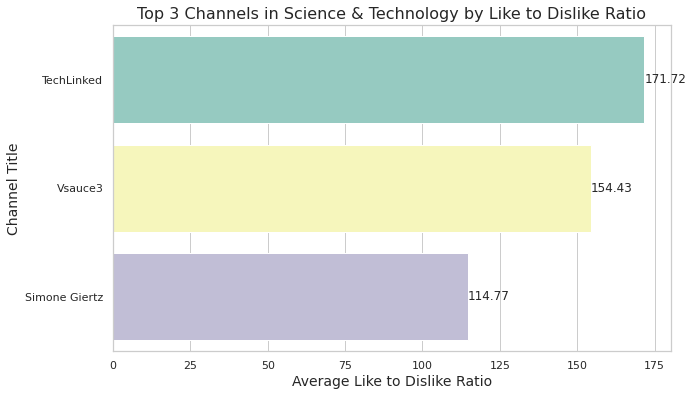

In [97]:
#Top 3 channels under selected category with the highest average like-dislike ratios
top_channels_in_category_by_like_to_dislike_ratio(videoCat, 'Science & Technology', top_n=3)

The visualisation above provides the top 3 channels with highest likes to dislikes ratio under the 'Science & Technology' category. This can be helpful to niche advertisers on the platform who want to leverage the top performing channels under a category, in order to maximise the reach of their products and services.

<h3> Objective 4.3.1.2: Comments-Views Engagement </h3>

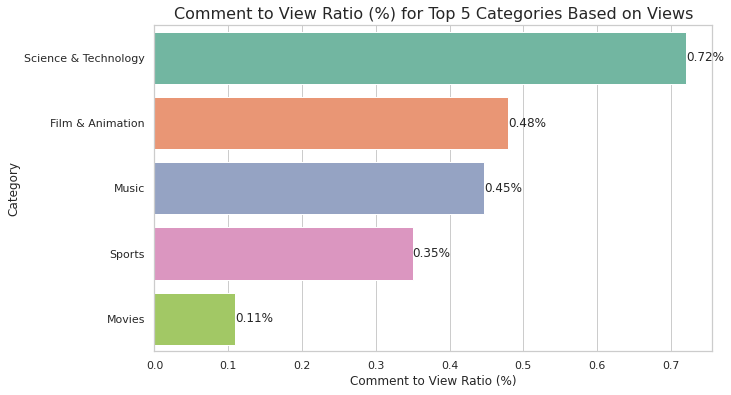

In [98]:
#Top 5 categories with the highest average comment to view ratios

comment_to_view_ratio(videoCat, top_n=5)

The bar chart illustrates the comment-to-views engagement ratio across the YouTube categories, which implies or rather showcases the categories generating more discussion relative to their viewership. Higher percentages indicate strong viewer engagement, as viewers actively comment, share opinions, and participate in discussions related to the content. This indicates an active community of users, with shared interests, within such categories. Notably, 'Science & Technology' surpasses 'Entertainment' (which has the highest comments and highest views separately) in comment-to-views engagement, emphasizing that it prompts more viewer discussion on YouTube. However, it is essential to note that high engagement ratios may not always signify positive interactions but can also reflect controversial or divisive content that generates numerous comments. This is another limitation of the dataset, as we are not able to see the nature of comments (positive vs negative vs neutral).

How to draw inferences from the comments to views engagement?

For instance, the 'Science & Technology' Category has a comments to views engagement of 0.72%, which indicates that for 1000 views a video under the specific category, it gets an approx of 7 comments from its users.

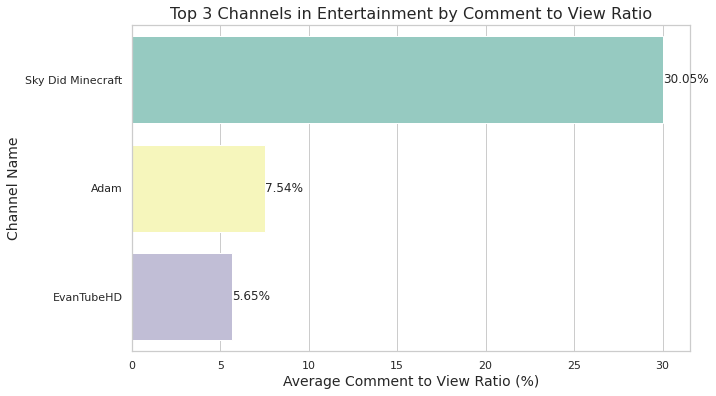

In [99]:
#Top 3 channels under selected category ('Entertainment') with the highest average comment to view ratios

top_channels_in_category_by_comment_to_view_ratio(videoCat, 'Entertainment', top_n=3)

The visualisation above provides the top 3 channels with highest comments to views ratio under the 'Entertainment' category. This can again be helpful to niche advertisers on the platform who want to leverage (or take a more granular outlook) at  the top performing channels under the category of their interest, in order to leverage the active communities under such channels.

<h3> Explanation of Objective 4.3: </h3>

The analysis of YouTube content categories across engagement metrics reveals that Entertainment, Music, Comedy, People & Blogs, and Sports are the most engaging categories, when we look into the individual metrics separately. Box plots, which provide a comprehensive view of engagement metrics, show variations in views, likes, dislikes, and the presence of outliers, reflecting videos which often go viral. However, calculates ratios such as Likes-to-dislikes & Comments-to-views ratios provide a more nuanced outlook towards popular categories and audience enaggement. A high likes to dislikes ratio indicate positive audience sentiment, with categories like "Pets & Animals" and "Gaming" showing strong approval. The comment-to-views engagement ratio highlights active viewer discussions, and active communities.  But it is important to note that high engagement ratios may not always imply positive interactions, and forms one of the limitations of the dataset. For marketers and content creators, these insights offer valuable guidance for targeting engaged audiences and understanding specific category dynamics on the platform.

<h3> Explanation of Objective 4: </h3>

The fourth objective delved into understanding user engagement dynamics across several YouTube video categories. Firstly, it brought forth the fact that there are several channels that post across multiple categories.  The analysis also explored the top categories based on individual metrics like likes, dislikes, comments, and views, but recognized that these metrics alone do not alone provide a complete picture of user interaction. Therefore, the objective considered additional metrics like the likes-to-dislikes ratio and comment-to-views engagement to offer a more comprehensive understanding for content creators and advertisers on how to tailor their strategies for maximum audience engagement on the platform.

# **Conclusion**

### Achievements
The project under consideration achieved key insights into the factors influencing video popularity. We found that tags of the respective videos, especially humorous ones, are crucial in trending videos, and concise titles (6 to 9 words) are more effective than longer ones. In descriptions, including 4-6 links and targeting readability for a younger audience proved to be crucial.

The temporal analysis uncovered intriguing patterns. It showed that shows and sports content trend quickly, with viewer engagement peaking in the evenings, particularly at around 5 PM, which implies that people engage with video content during their leisure time in the evening. From 1 PM to 4 PM, it was also seen that this period constitutes a strategic period to increase the likelihood of videos to trend. Content under the 'Entertainment' category was consistently popular, especially on weekends.

The study also emphasized the importance of engagement metrics like views, likes, and comments. Additionally, the analysis revealed that different YouTube categories impact user engagement differently, highlighting the importance of considering various engagement metrics for a comprehensive understanding.

Overall, these insights from this project offer valuable guidance for content creators and advertisers in optimizing YouTube strategies for increased visibility and engagement.

### Limitations

The analysis our our project has certain limitations:

1. Inconsistent Category Mapping: A key limitation is the issue of missing category names in the dataset, with many videos sharing the same category ID of 29. This suggests a problem in the category ID-to-name mapping process. 

2. Biased Dataset: The dataset used in our study was focused exclusively on statistics related to trending videos within a specific timeframe, without including data from non-trending videos. This selective scope may limit the breadth and general applicability of our findings, as it doesn't account for the wide range of content types and user behaviors present in non-trending videos.

3. Limited User Engagement Metrics: Our analysis simplifies the measurement of user engagement due to the limited scope of available variables. For example, the dataset did not include metrics that would allow us to delve into the sentiment of comments (whether they are positive, neutral, or negative), nor did it capture the number of times videos were shared, among other potentially insightful engagement indicators.

4. Temporal Analysis Constraints: The temporal analysis in our study faces limitations due to the limitation of the dataset. The restricted temporal variables hinder our comprehensive understanding of how trends evolve over time. Consequently, the dynamics of user engagement in relation to various time-related factors are not thoroughly examined in our analysis.

### Future Work

While our study has certain limitations, we can consider the following aspects for future research:

1. Diverse and Representative Datasets: We can work on using datasets that represent a wider range of videos, including non-trending videos while ensuring that there are no category mapping errors. This will help us get a better overall picture of what trends and user behaviors look like on YouTube.

2. Expanding User Engagement Metrics: For a more nuanced understanding of user engagement, it would be beneficial to go beyond just calculating likes/dislikes and comment/views ratios. Incorporating a detailed analysis of comments to gauge their nature, sentiment, and content would offer a richer insight into audience interaction. Additionally, integrating other metrics such as the number of shares, watch time, and repeat views could provide a more comprehensive view of how users engage with the content. This broader approach would allow for a deeper exploration of audience behavior and preferences.

3. Extensive Temporal Analysis: For a deeper understanding of trends and their evolution over time, a more extensive dataset is required. The current dataset, limited to information on the time of publishing and when videos became trending, restricts our ability to thoroughly analyze changes in online content consumption over extended periods. Access to a broader range and more granular temporal data would enable us to conduct more detailed studies on how trends develop and shift over time.

4. Development of Predictive Models: Building on these enhanced datasets and metrics, future research could focus on developing predictive models for YouTube trends. By integrating diverse and representative datasets, expanded user engagement metrics, and extensive temporal analysis, we can create algorithms that accurately forecast emerging trends and shifts in user preferences. This predictive model would utilize machine learning techniques to analyze patterns and correlations within the data. Such a model could predict which types of content are likely to become trending, understand the lifecycle of trends, and anticipate changes in user behavior. This would be invaluable for content creators, marketers, and YouTube itself for strategic planning and content optimization.